<a href="https://colab.research.google.com/github/hsantos1985/core_projects/blob/main/MODELO_SERIES_TEMPORAIS_CHUVAS_MENSAIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####O OBJETIVO DESTE PROJETO É CRIAR MODELOS DE TIME SERIES BASEADOS NOS DADOS PLUVIOMÉTRICOS MENSAIS DA CIDADE DE SÃO PAULO.  ENTRE 1985 E 2023.COM ISSO, REALIZAR O COMPARATIVO ENTRE ESTES MODELOS


---Os dados podem ser encontrados conforme abaixo:
https://hidrologia.spaguas.sp.gov.br/

PREFIXO: 	E3-262

NOME DO POSTO: 	GUARAU

MUNICÍPIO: 	SAO PAULO

CURSO D'ÁGUA: 	CABUCU DE BAIXO,R/(ITAGUACU,COR)

LATITUDE: 	23°26'33"

LONGITUDE: 	46°39'01"

Obs: valores com --- representam dados inexistentes.

Chuva Mensal (mm)

--SERÃO USADOS COMO DADOS DE TREINO, AS CHUVAS MENSAIS DE 1985 A 2020
--A BASE OOT (OUT OF THE TIME) SERÁ FORMADA PELOS DADOS DE CHUVAS DE 2021, 22 E 23

####1-BIBLIOTECAS

In [1]:
install.packages("dplyr")
install.packages('forecast')
install.packages("tidyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [87]:
library(forecast)
library(dplyr)
library(tidyr)
library(urca)

In [23]:
#configuração dos gráficos
options(repr.plot.width = 19, repr.plot.height = 10)

####2-OBTENÇÃO DOS DADOS

In [88]:
#OBTENDO OS DADOS
chuva_mensal<-
  read.csv2('/content/chuva_mensal_atualizada.csv', sep = ";", encoding = 'UTF-8')

In [89]:
#VERIFICANDO A QUANTIDADE DE LINHAS E COLUNAS DO DATASET
dim(chuva_mensal)

[1] 40 13

In [90]:
View(chuva_mensal)

Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1985,"184,9","242,9",230,59.00,126.20,"14,6",4.00,"21,8","126,1","71,1","111,3","155,2"
1986,"199,6",221,"218,7",106.50,113.10,"3,9",30.30,---,"34,5","60,7","242,5","389,9"
1987,"525,8",---,"161,3",98.10,293.80,"183,9",11.80,"30,9","80,2","84,8","72,7","152,1"
1988,"268,7","224,4","189,2",175.10,224.90,"58,6",1.30,"0,2","28,4","173,9","100,2","289,8"
1989,"312,9","344,3","288,2",66.30,21.70,"52,5",150.10,"32,9","52,1","80,1",88,"236,7"
1990,"284,1","196,9","310,1",85.80,77.90,"50,6",121.20,"76,3","97,2","206,8","116,3","149,8"
1991,"330,7","340,3","522,4",200.30,43.30,"96,8",28.20,"37,3","101,4",168,"67,3","237,9"
1992,"129,2","258,5",---,87.20,93.50,"11,6",40.90,"24,7","150,6","219,6",---,"211,7"
1993,"221,5","225,7",110,84.60,133.90,"74,7",11.20,"40,8","210,1","134,1","125,5","170,5"


In [91]:
#verificando o tipo dos dados
str(chuva_mensal)

'data.frame':	40 obs. of  13 variables:
 $ Ano      : chr  "1985" "1986" "1987" "1988" ...
 $ Janeiro  : chr  "184,9" "199,6" "525,8" "268,7" ...
 $ Fevereiro: chr  "242,9" "221" "---" "224,4" ...
 $ Março    : chr  "230" "218,7" "161,3" "189,2" ...
 $ Abril    : num  59 106.5 98.1 175.1 66.3 ...
 $ Maio     : num  126.2 113.1 293.8 224.9 21.7 ...
 $ Junho    : chr  "14,6" "3,9" "183,9" "58,6" ...
 $ Julho    : num  4 30.3 11.8 1.3 150.1 ...
 $ Agosto   : chr  "21,8" "---" "30,9" "0,2" ...
 $ Setembro : chr  "126,1" "34,5" "80,2" "28,4" ...
 $ Outubro  : chr  "71,1" "60,7" "84,8" "173,9" ...
 $ Novembro : chr  "111,3" "242,5" "72,7" "100,2" ...
 $ Dezembro : chr  "155,2" "389,9" "152,1" "289,8" ...


#####2.2-TRATAMENTO DOS DADOS

In [8]:
#RETIRANDO AS 2 ÚLTIMAS LINHAS - 2023,2022,2021 e MÉDIA
chuva_mensal_int<-
chuva_mensal %>%
  filter(Ano!='2023') %>%
  filter(Ano!='2022') %>%
filter(Ano!='2021')%>%
  filter(Ano!='  Média:')

In [9]:
chuva_mensal_int

Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1985,"184,9","242,9",230,59.0,126.2,"14,6",4.0,"21,8","126,1","71,1","111,3","155,2"
1986,"199,6",221,"218,7",106.5,113.1,"3,9",30.3,---,"34,5","60,7","242,5","389,9"
1987,"525,8",---,"161,3",98.1,293.8,"183,9",11.8,"30,9","80,2","84,8","72,7","152,1"
1988,"268,7","224,4","189,2",175.1,224.9,"58,6",1.3,"0,2","28,4","173,9","100,2","289,8"
1989,"312,9","344,3","288,2",66.3,21.7,"52,5",150.1,"32,9","52,1","80,1",88,"236,7"
1990,"284,1","196,9","310,1",85.8,77.9,"50,6",121.2,"76,3","97,2","206,8","116,3","149,8"
1991,"330,7","340,3","522,4",200.3,43.3,"96,8",28.2,"37,3","101,4",168,"67,3","237,9"
1992,"129,2","258,5",---,87.2,93.5,"11,6",40.9,"24,7","150,6","219,6",---,"211,7"
1993,"221,5","225,7",110,84.6,133.9,"74,7",11.2,"40,8","210,1","134,1","125,5","170,5"


In [10]:
#TRANSFORANDO AS COLUNAS EM NUMÉRICAS
#substituindo as virgulas por pontos
chuva_mensal_int2<-
chuva_mensal_int %>%
  mutate(across(where(is.character),~ as.numeric(gsub(",",".",.))))

Warning message:
“There were 8 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(where(is.character), ~as.numeric(gsub(",", ".", .)))`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 7 remaining warnings.”


In [11]:
chuva_mensal_int2

Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1985,184.9,242.9,230.0,59.0,126.2,14.6,4.0,21.8,126.1,71.1,111.3,155.2
1986,199.6,221.0,218.7,106.5,113.1,3.9,30.3,NA,34.5,60.7,242.5,389.9
1987,525.8,NA,161.3,98.1,293.8,183.9,11.8,30.9,80.2,84.8,72.7,152.1
1988,268.7,224.4,189.2,175.1,224.9,58.6,1.3,0.2,28.4,173.9,100.2,289.8
1989,312.9,344.3,288.2,66.3,21.7,52.5,150.1,32.9,52.1,80.1,88.0,236.7
1990,284.1,196.9,310.1,85.8,77.9,50.6,121.2,76.3,97.2,206.8,116.3,149.8
1991,330.7,340.3,522.4,200.3,43.3,96.8,28.2,37.3,101.4,168.0,67.3,237.9
1992,129.2,258.5,NA,87.2,93.5,11.6,40.9,24.7,150.6,219.6,NA,211.7
1993,221.5,225.7,110.0,84.6,133.9,74.7,11.2,40.8,210.1,134.1,125.5,170.5


In [13]:
# VERIFICANDO OS VALORES AUSENTES NAS
sapply(chuva_mensal_int2,function(x) sum(is.na(x)))

Ano   Janeiro Fevereiro     Março     Abril      Maio     Junho     Julho 
        0         3         2         2         0         0         1         0 
   Agosto  Setembro   Outubro  Novembro  Dezembro 
        4         0         1         2         2

In [14]:
# VERIFICANDO OS VALORES NOT A NUMBER
sapply(chuva_mensal_int2,function(x) sum(is.nan(x)))

Ano   Janeiro Fevereiro     Março     Abril      Maio     Junho     Julho 
        0         0         0         0         0         0         0         0 
   Agosto  Setembro   Outubro  Novembro  Dezembro 
        0         0         0         0         0

In [15]:
#SUBSTITUINDO OS VALORES AUSENTES PELA MÉDIA DO MÊS
chuva_mensal_int3<-
chuva_mensal_int2 %>%
mutate(across(
where(is.numeric),
~ifelse(is.na(.),mean(.,na.rm = TRUE),.)
))

In [16]:
#verificando a média de janeiro
mean(chuva_mensal_int3$Janeiro,, na.rm = TRUE)

[1] 303.7485

In [17]:
chuva_mensal_int3

Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1985,184.9000,242.9000,230.0000,59.0,126.2,14.60,4.0,21.80000,126.1,71.1000,111.3000,155.2000
1986,199.6000,221.0000,218.7000,106.5,113.1,3.90,30.3,27.84688,34.5,60.7000,242.5000,389.9000
1987,525.8000,254.8588,161.3000,98.1,293.8,183.90,11.8,30.90000,80.2,84.8000,72.7000,152.1000
1988,268.7000,224.4000,189.2000,175.1,224.9,58.60,1.3,0.20000,28.4,173.9000,100.2000,289.8000
1989,312.9000,344.3000,288.2000,66.3,21.7,52.50,150.1,32.90000,52.1,80.1000,88.0000,236.7000
1990,284.1000,196.9000,310.1000,85.8,77.9,50.60,121.2,76.30000,97.2,206.8000,116.3000,149.8000
1991,330.7000,340.3000,522.4000,200.3,43.3,96.80,28.2,37.30000,101.4,168.0000,67.3000,237.9000
1992,129.2000,258.5000,230.6265,87.2,93.5,11.60,40.9,24.70000,150.6,219.6000,145.0353,211.7000
1993,221.5000,225.7000,110.0000,84.6,133.9,74.70,11.2,40.80000,210.1,134.1000,125.5000,170.5000


In [18]:
# VERIFICANDO OS VALORES AUSENTES NAS
sapply(chuva_mensal_int3,function(x) sum(is.na(x)))

Ano   Janeiro Fevereiro     Março     Abril      Maio     Junho     Julho 
        0         0         0         0         0         0         0         0 
   Agosto  Setembro   Outubro  Novembro  Dezembro 
        0         0         0         0         0

In [19]:
#DEIXANDO O DF FINAL PARA AS ANÁLISES
#RETIRANDO A COLUNA ANO
chuva_mensal_final<-
  chuva_mensal_int3 %>%
    select(-one_of('Ano'))

####3-CRIAÇÃO DA SÉRIE TEMPORAL

In [20]:
#transformando os dados de dataframe para vertor
#NÃO É POSSÍVEL APLICAR SERIES TEMPORAIS EM DADOS NO FORMMATO DATAFRAME
chuva_sp<-
as.vector(t(chuva_mensal_final))

In [21]:
#CRIAÇÃO DA SÉRIE
serie<-
  ts(chuva_sp, start = c(1985,1),end = c(2019,12), frequency = 12)

print(serie)


           Jan       Feb       Mar       Apr       May       Jun       Jul
1985 184.90000 242.90000 230.00000  59.00000 126.20000  14.60000   4.00000
1986 199.60000 221.00000 218.70000 106.50000 113.10000   3.90000  30.30000
1987 525.80000 254.85882 161.30000  98.10000 293.80000 183.90000  11.80000
1988 268.70000 224.40000 189.20000 175.10000 224.90000  58.60000   1.30000
1989 312.90000 344.30000 288.20000  66.30000  21.70000  52.50000 150.10000
1990 284.10000 196.90000 310.10000  85.80000  77.90000  50.60000 121.20000
1991 330.70000 340.30000 522.40000 200.30000  43.30000  96.80000  28.20000
1992 129.20000 258.50000 230.62647  87.20000  93.50000  11.60000  40.90000
1993 221.50000 225.70000 110.00000  84.60000 133.90000  74.70000  11.20000
1994 196.90000 184.40000 231.60000 111.40000  54.90000  30.50000  39.20000
1995 373.80000 383.10000 267.70000  73.90000  79.70000  31.20000  46.80000
1996 334.30000 376.50000 284.50000  42.30000  21.70000  45.10000  12.20000
1997 235.00000 187.60000 

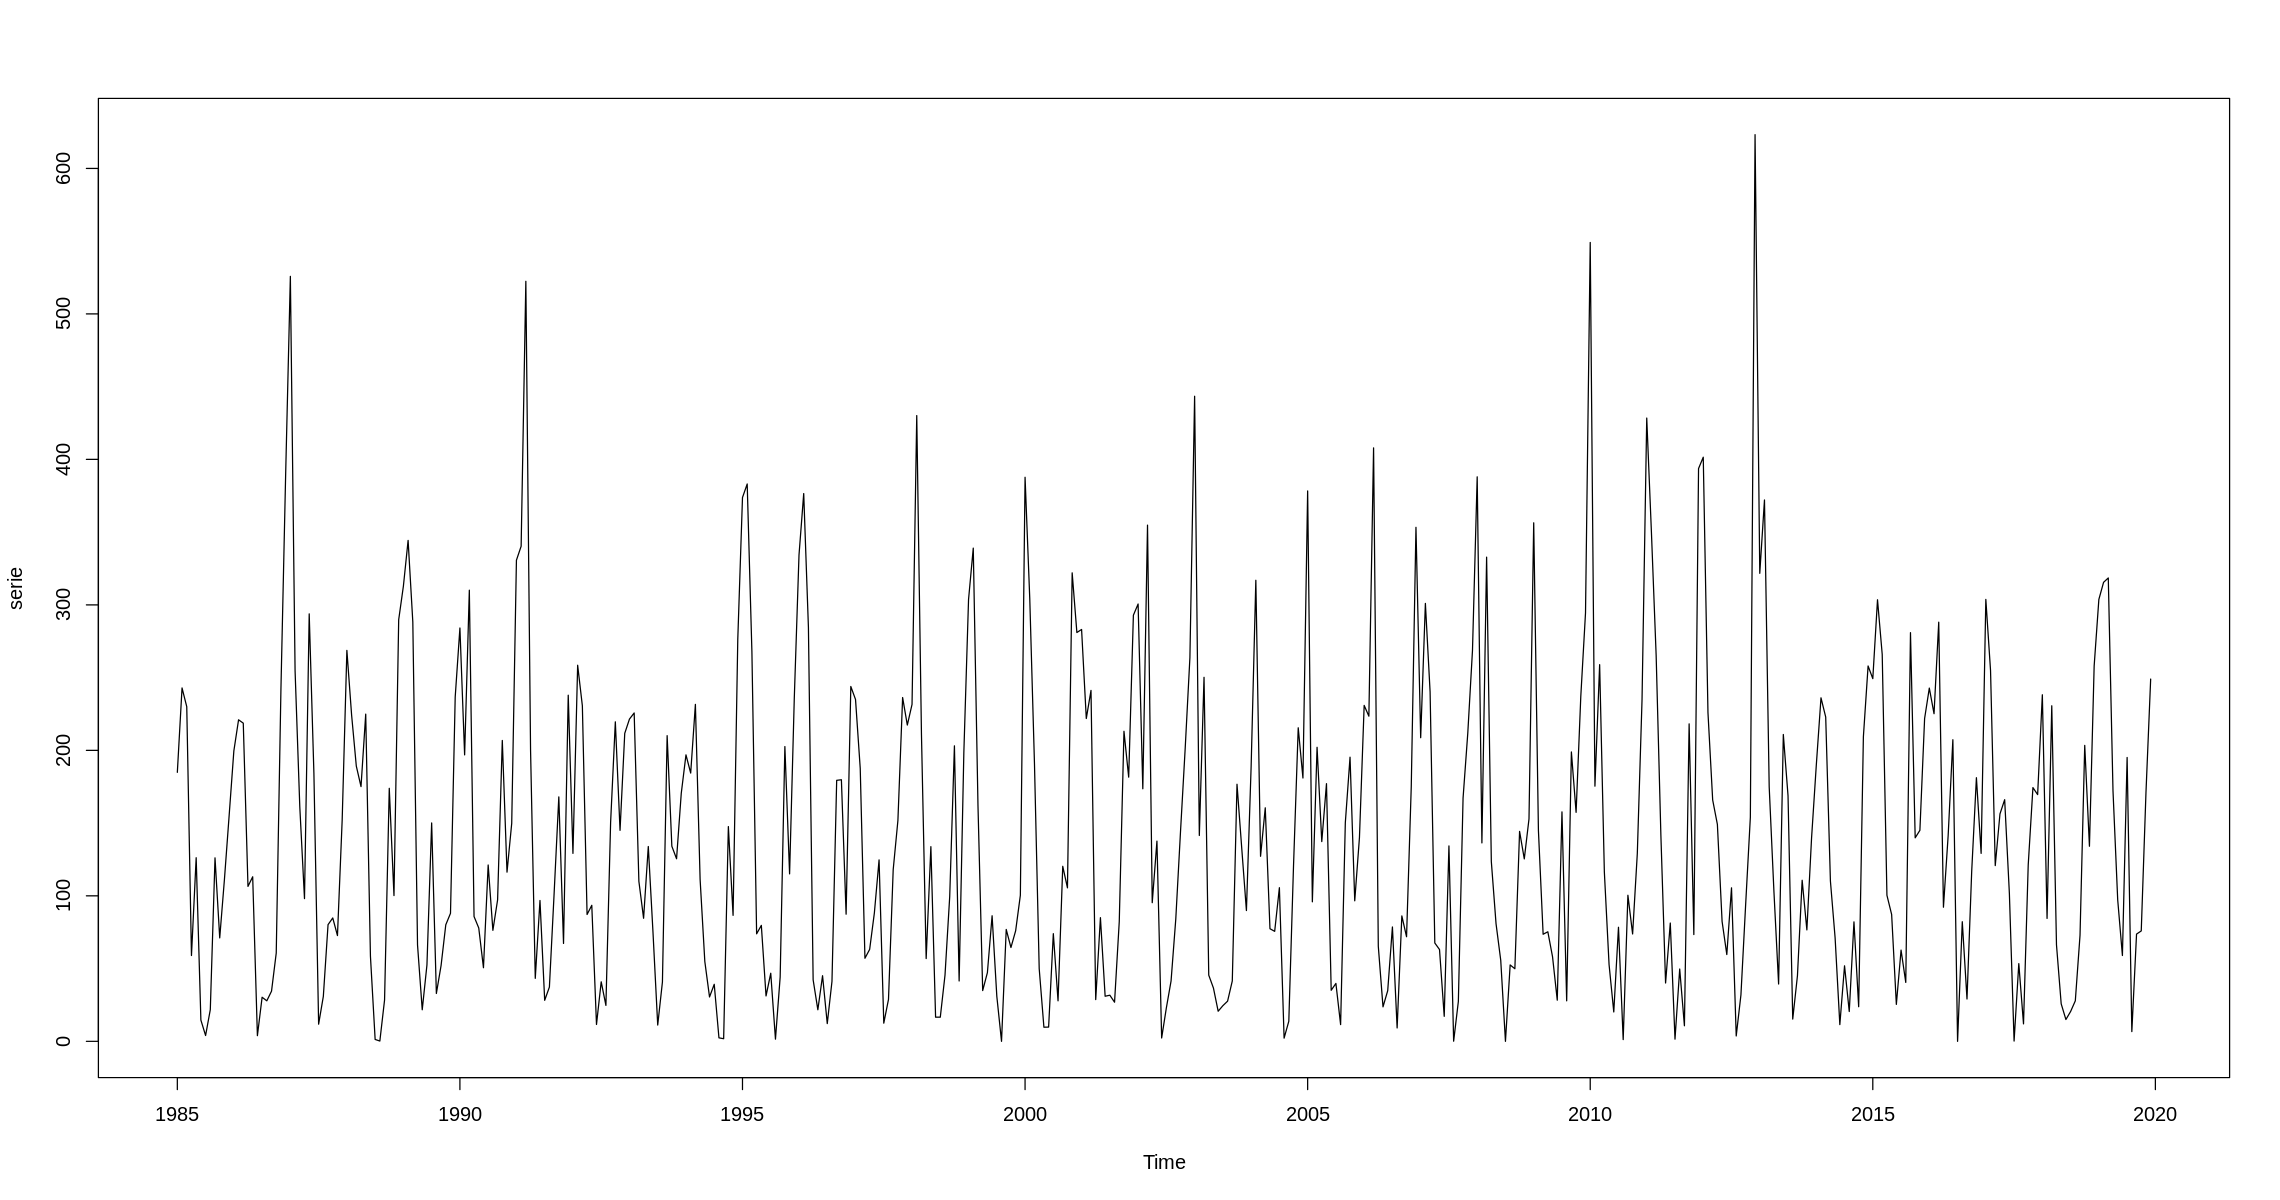

In [24]:
plot(serie)

####4-ANÁLISE TRANSFORMAÇÃO DA SÉRIE TEMPORAL

In [25]:
#ANÁLISE DE DECOMPOSIÇÃO DA SÉRIE
decomposicao<-
  decompose(serie)

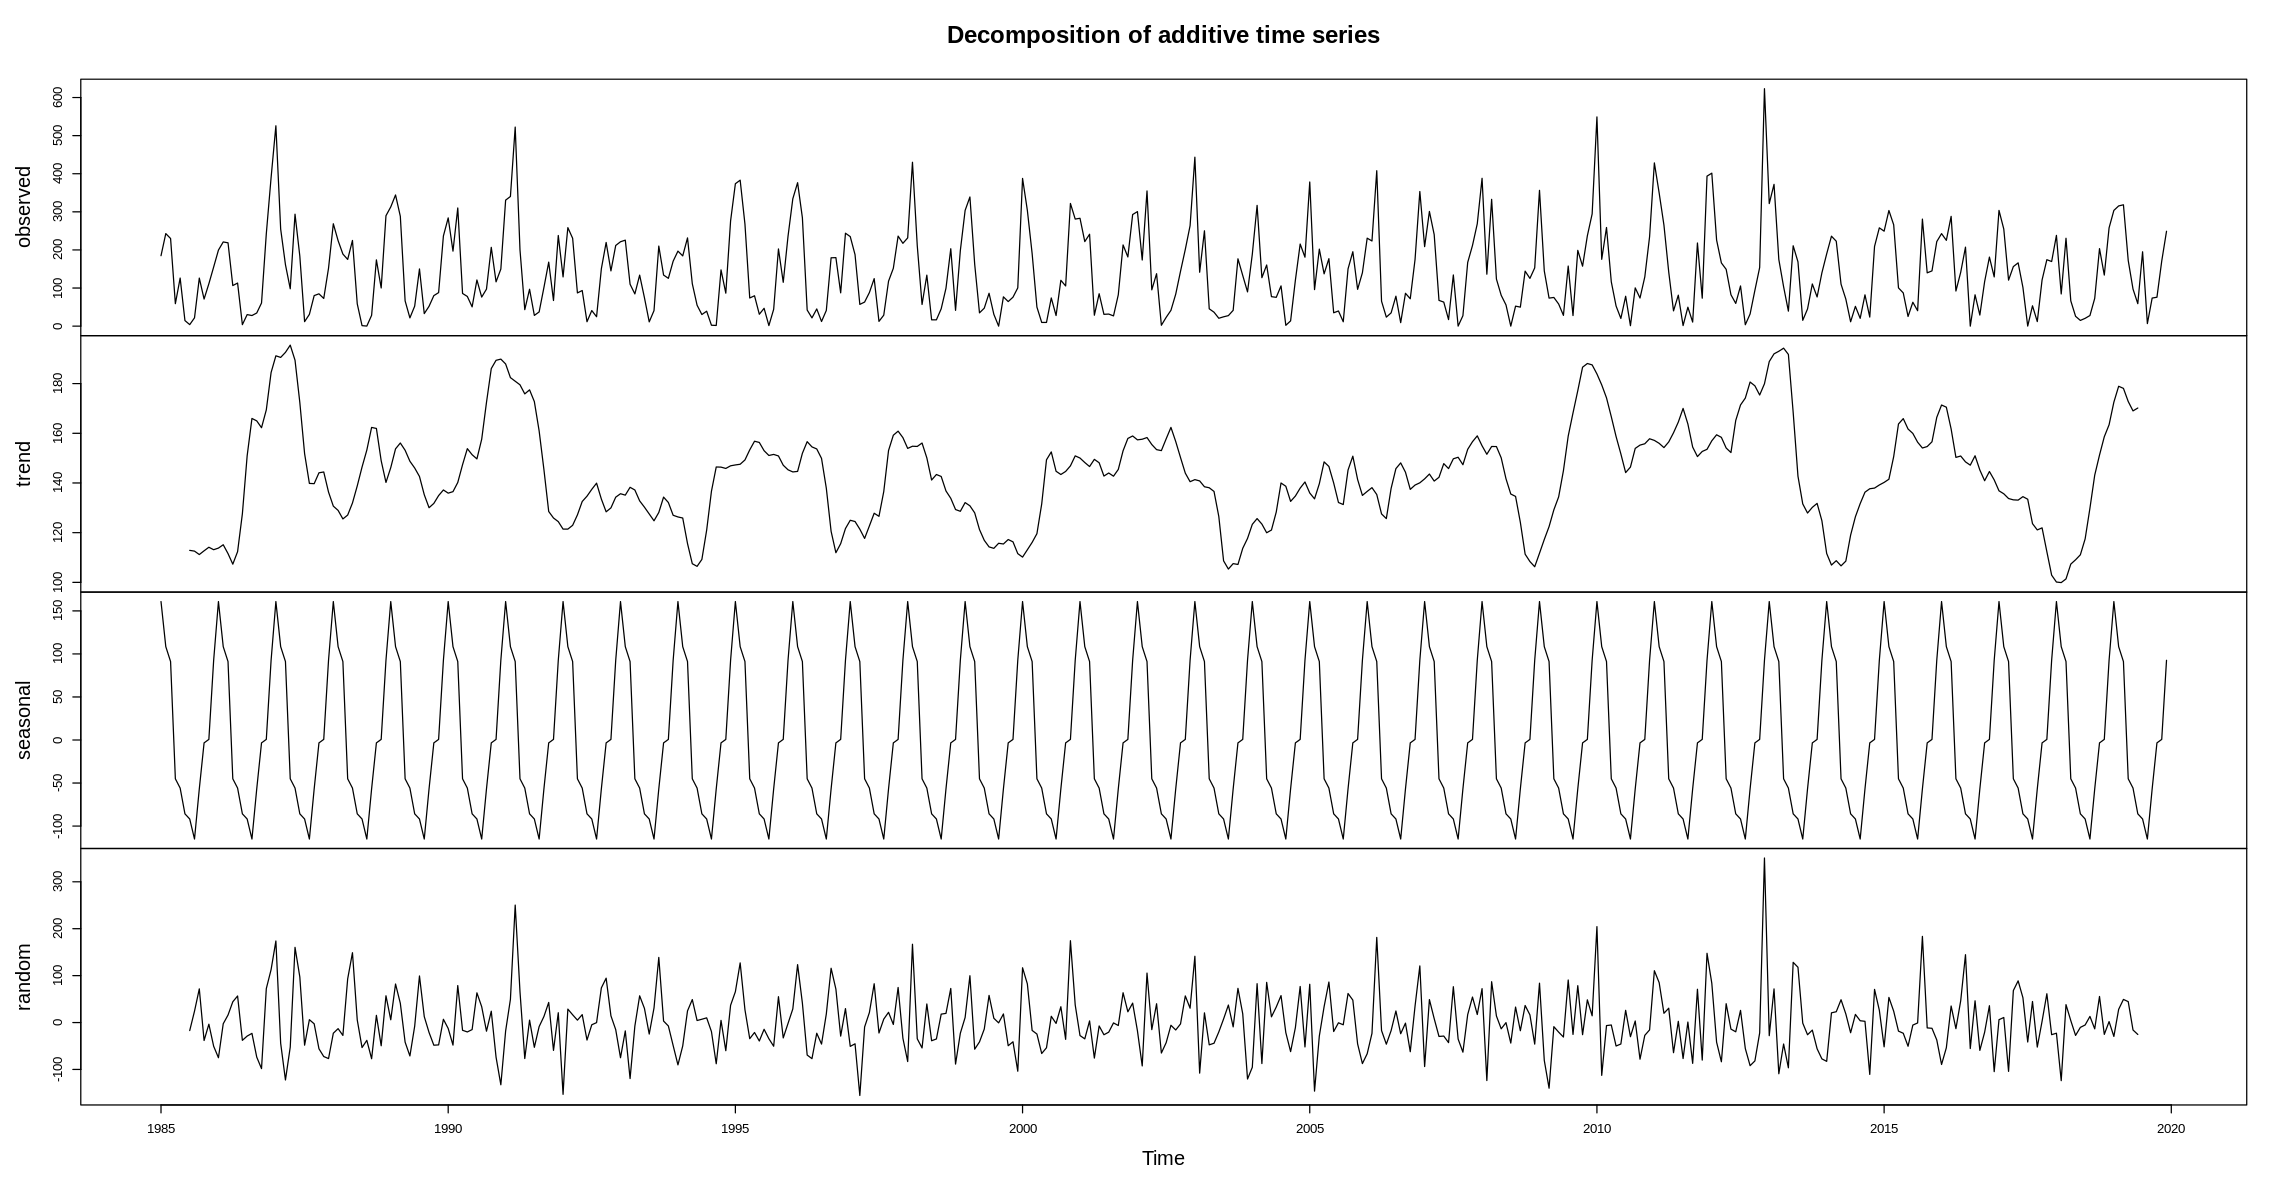

In [26]:
plot(decomposicao)

In [27]:
#suavização
serie2<-
  tsclean(serie)

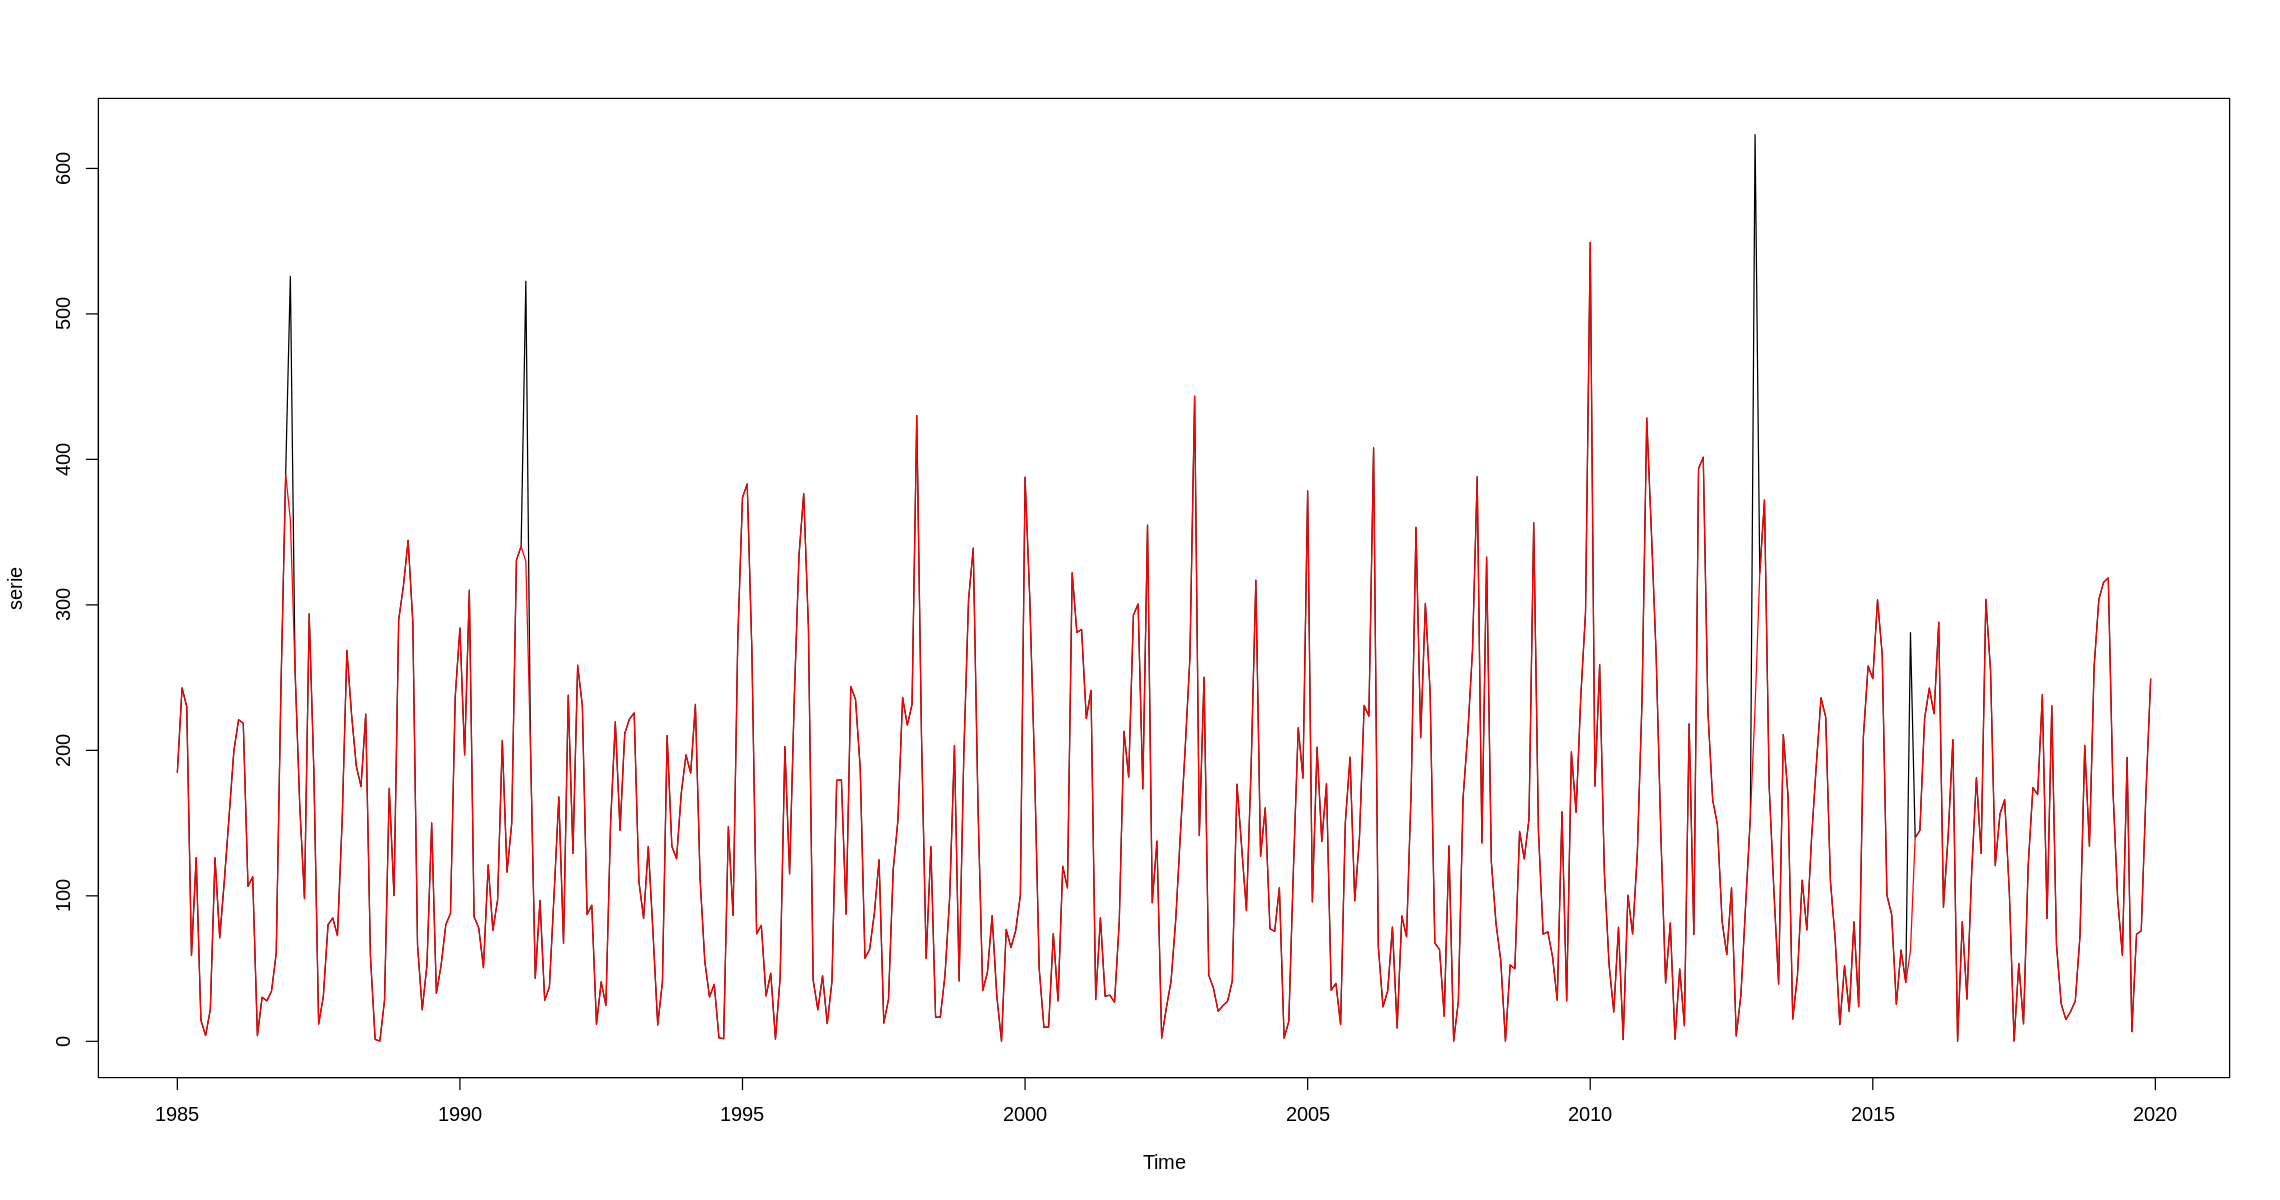

In [28]:
# Comparação
plot(serie)
lines(serie2, col="red")

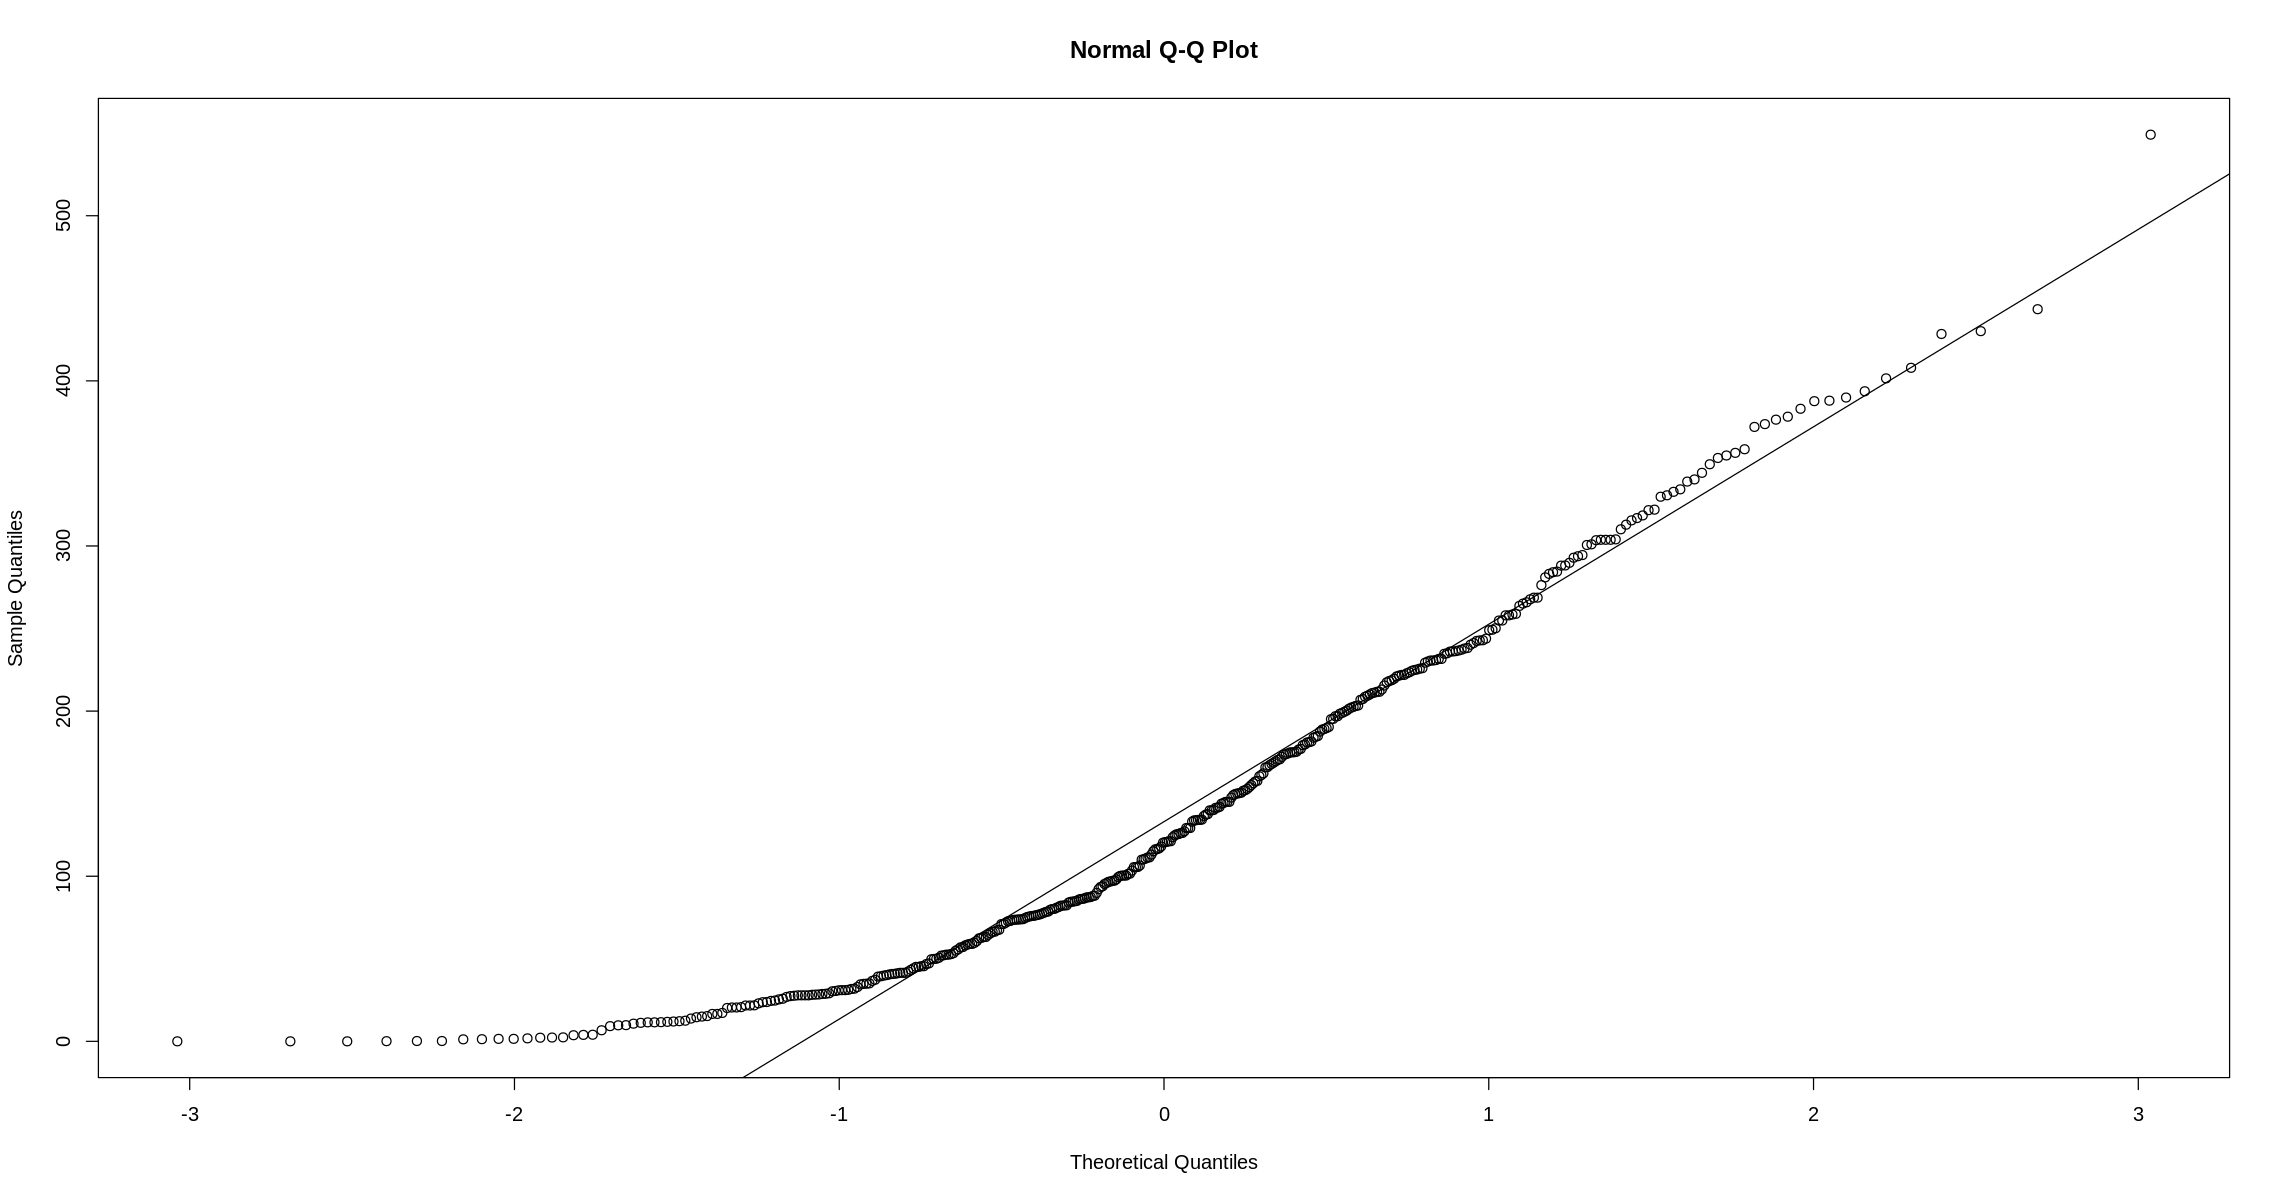

In [29]:
### NORMALIDADE
qqnorm(serie2)
qqline(serie2)

In [30]:
#transformação para a normaidade da serie
#como existem dados igua a 0
#os dados serão elevados a 1/3
serie3<-
  sign(serie2)*abs(serie2)^(1/3)
print(serie3)

           Jan       Feb       Mar       Apr       May       Jun       Jul
1985 5.6969924 6.2393954 6.1269257 3.8929964 5.0159491 2.4440924 1.5874011
1986 5.8441342 6.0459436 6.0248966 4.7400531 4.8360138 1.5740609 3.1175556
1987 7.1044141 6.3401552 5.4434987 4.6120039 6.6478916 5.6867034 2.2766381
1988 6.4529142 6.0767908 5.7408171 5.5945099 6.0813008 3.8841787 1.0913929
1989 6.7889382 7.0088324 6.6053828 4.0473539 2.7892445 3.7444362 5.3144733
1990 6.5739099 5.8176632 6.7686271 4.4105806 4.2708320 3.6987091 4.9488111
1991 6.9153059 6.9815842 6.9092263 5.8509580 3.5115266 4.5915408 3.0438018
1992 5.0553843 6.3702066 6.1324834 4.4344405 4.5387598 2.2637024 3.4454115
1993 6.0504997 6.0885029 4.7914199 4.3899218 5.1159567 4.2115329 2.2373779
1994 5.8176632 5.6918525 6.1411002 4.8116615 3.8006462 3.1243999 3.3969985
1995 7.2035476 7.2627994 6.4448991 4.1964445 4.3034765 3.1481218 3.6036999
1996 6.9403088 7.2208501 6.5769937 3.4842833 2.7892445 3.5595261 2.3020775
1997 6.1710058 5.7245886 

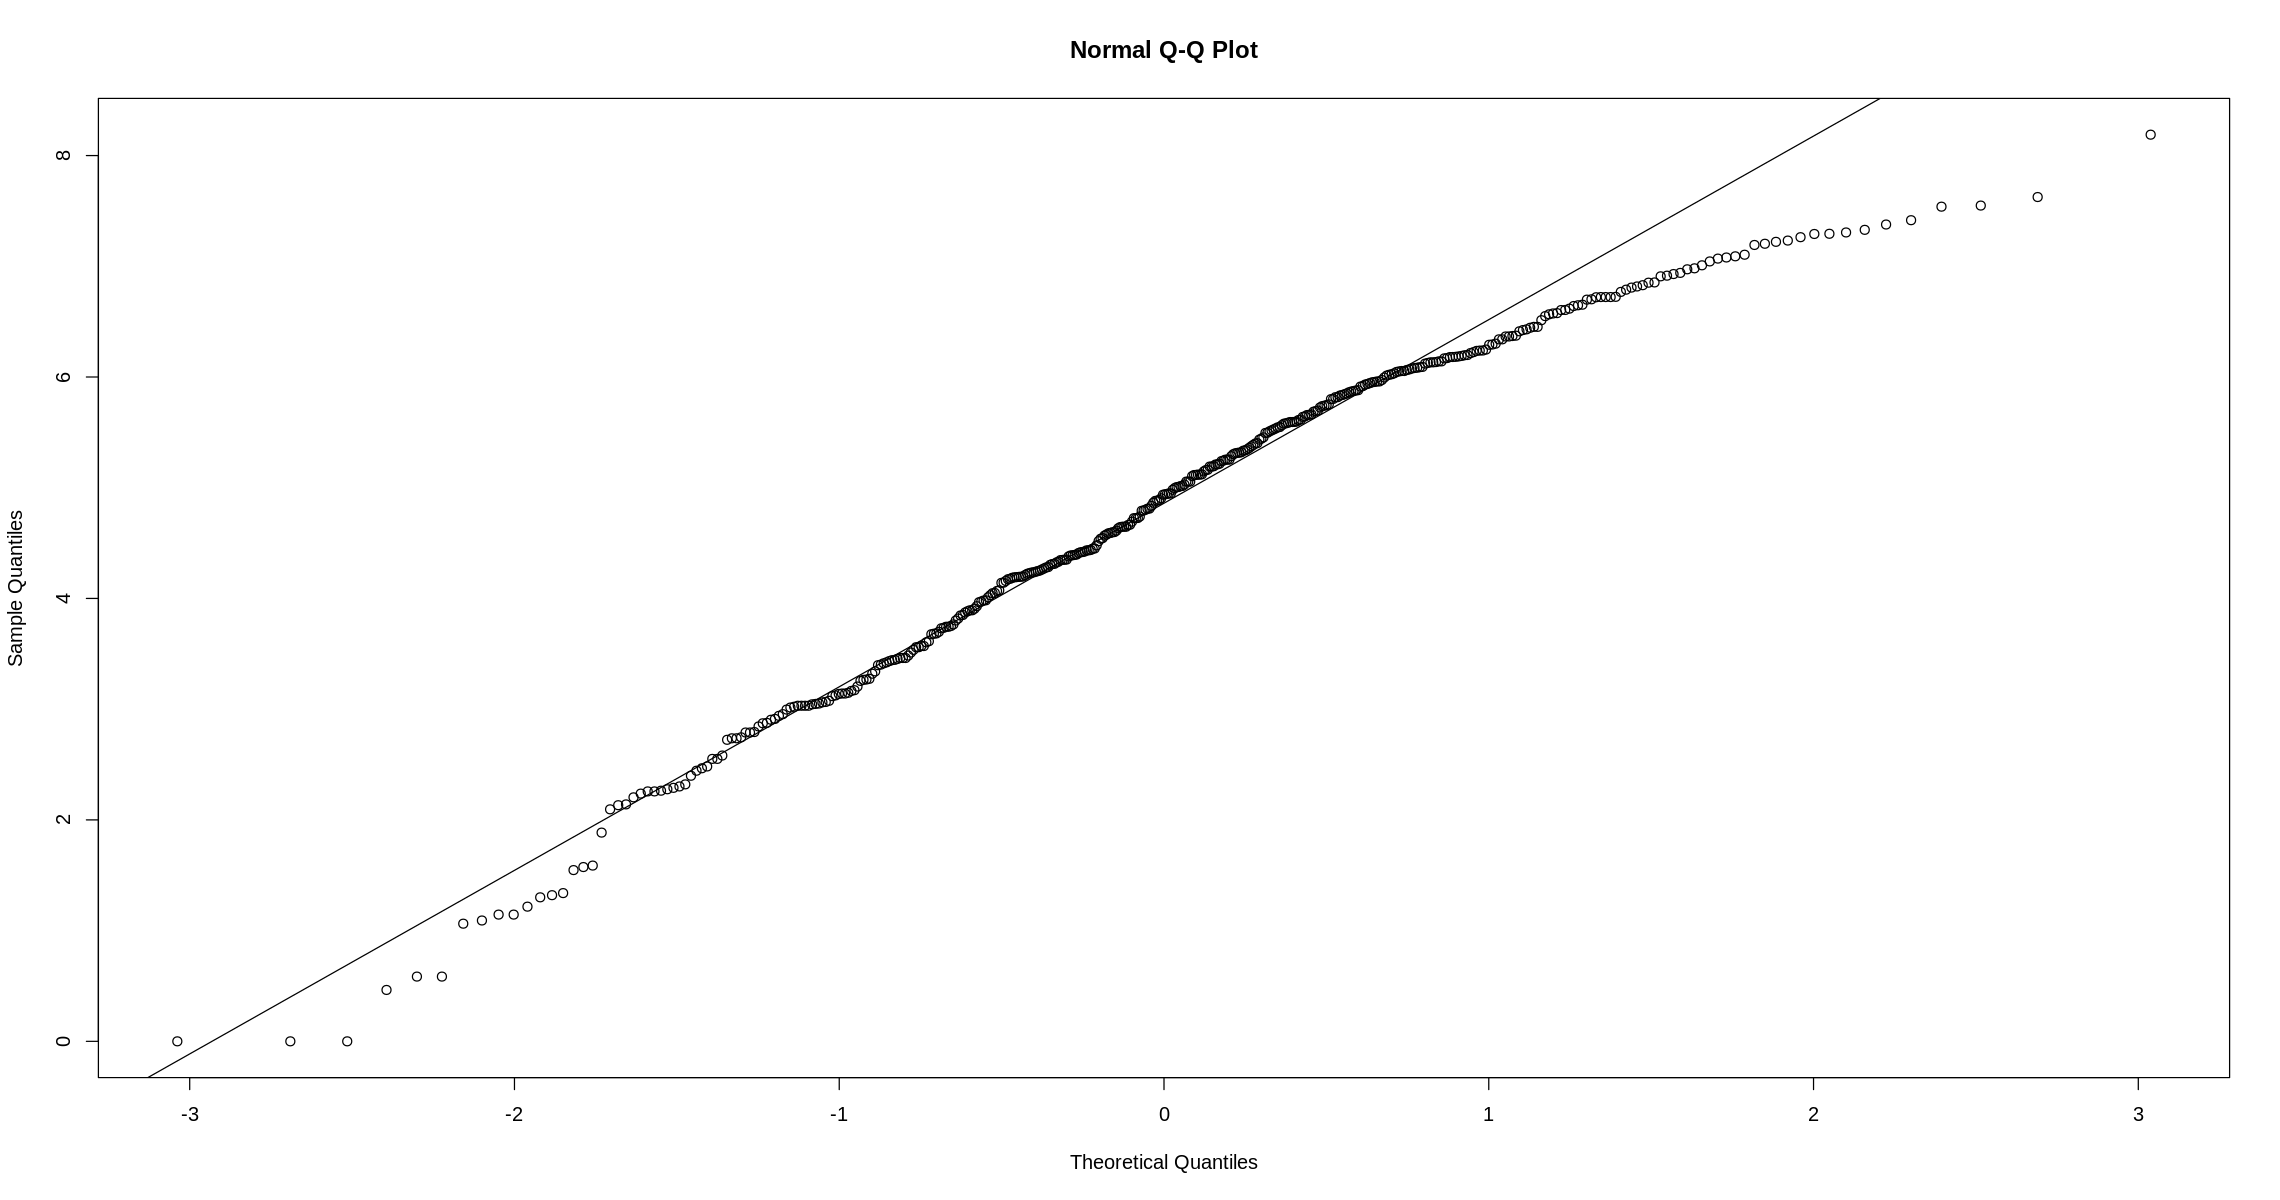

In [31]:
### NORMALIDADE
qqnorm(serie3)
qqline(serie3)

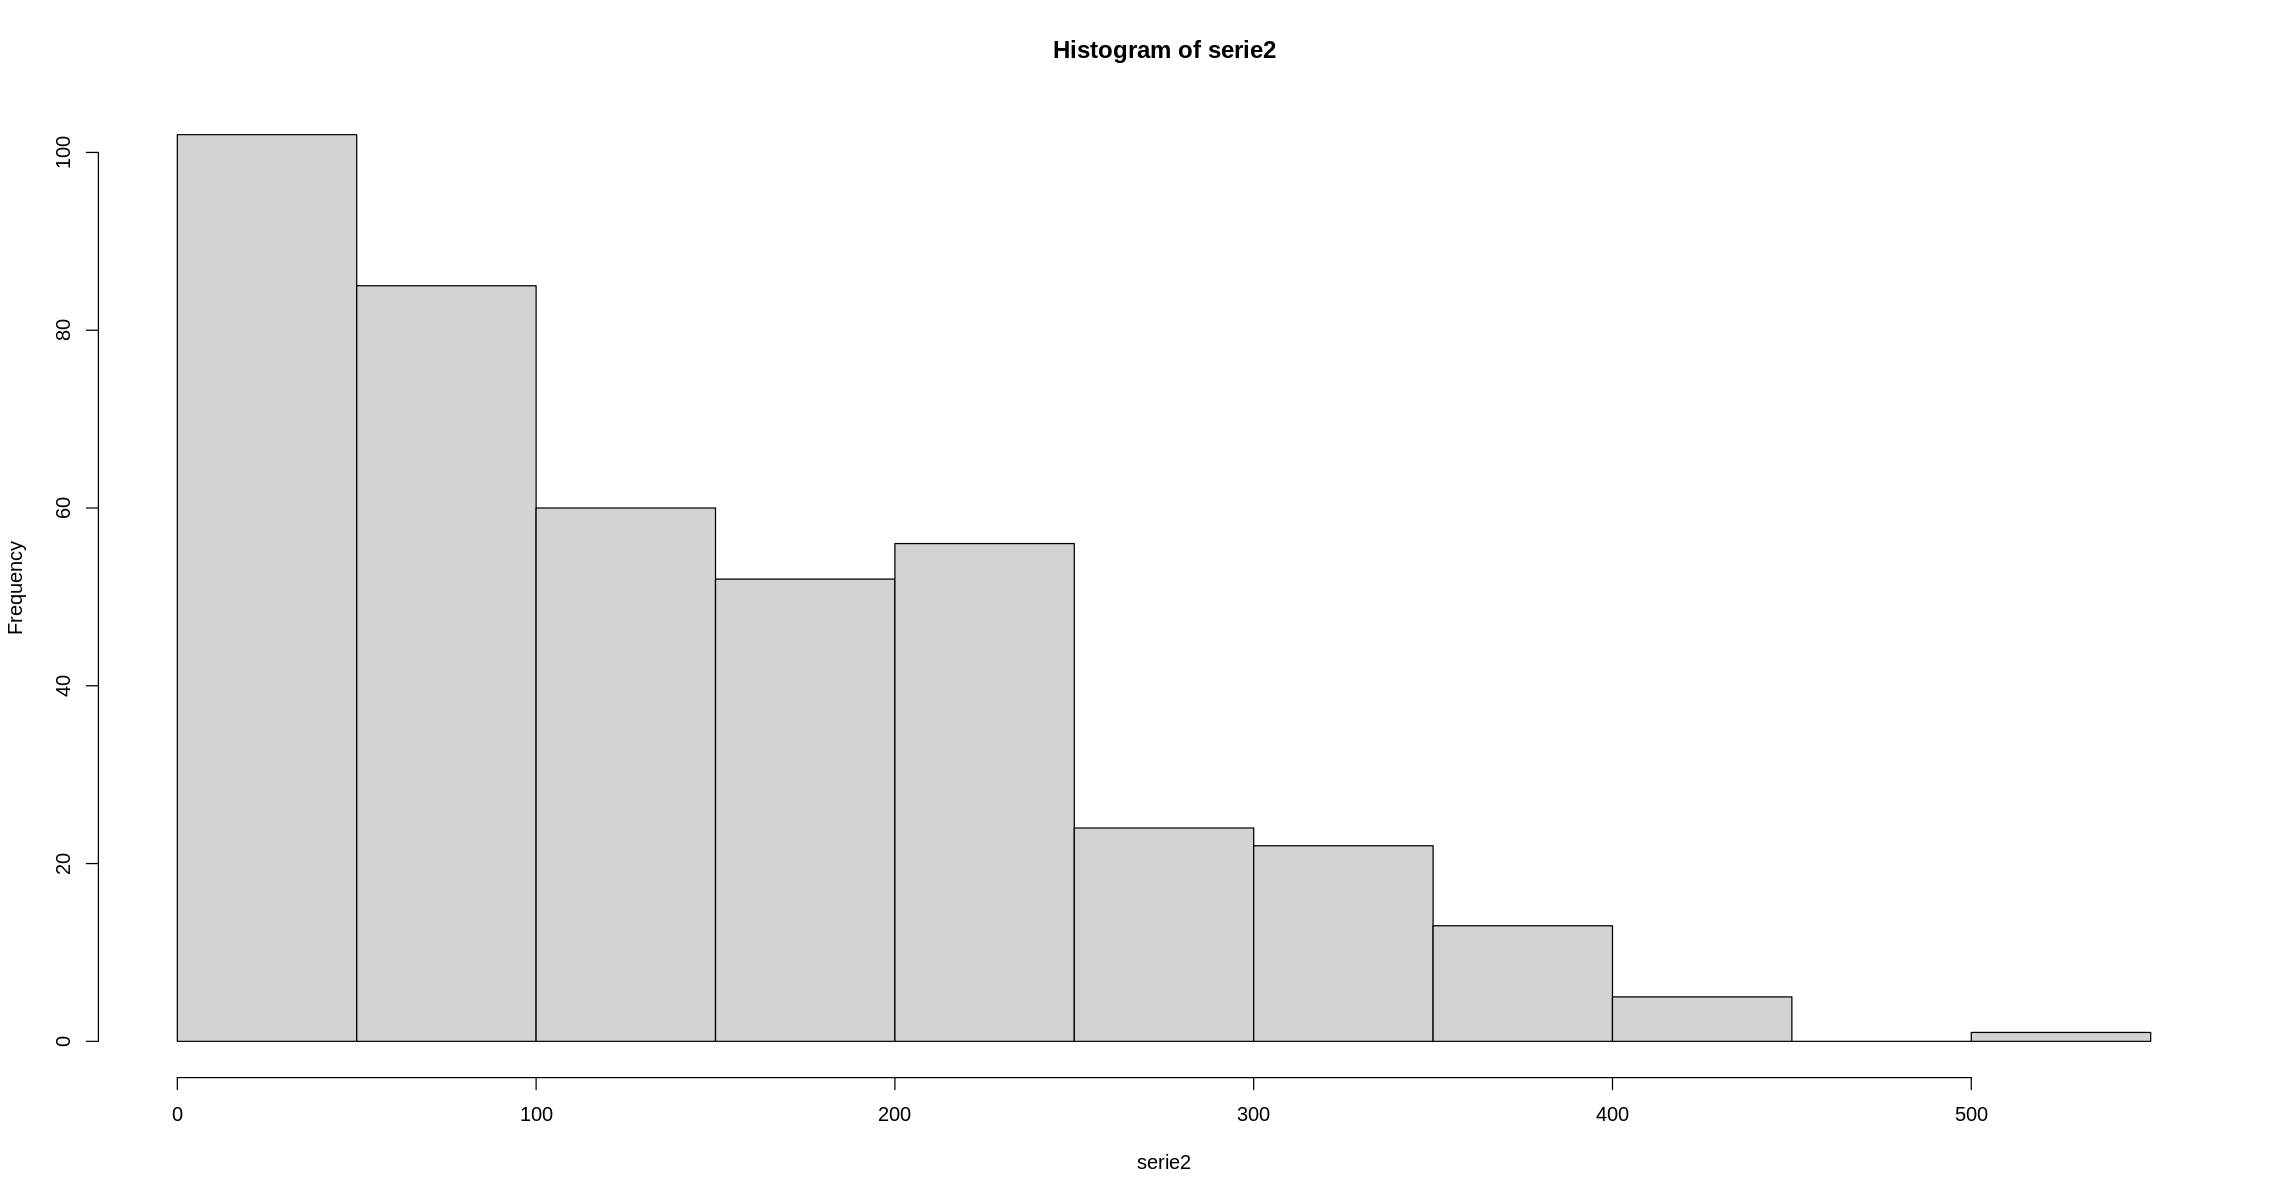

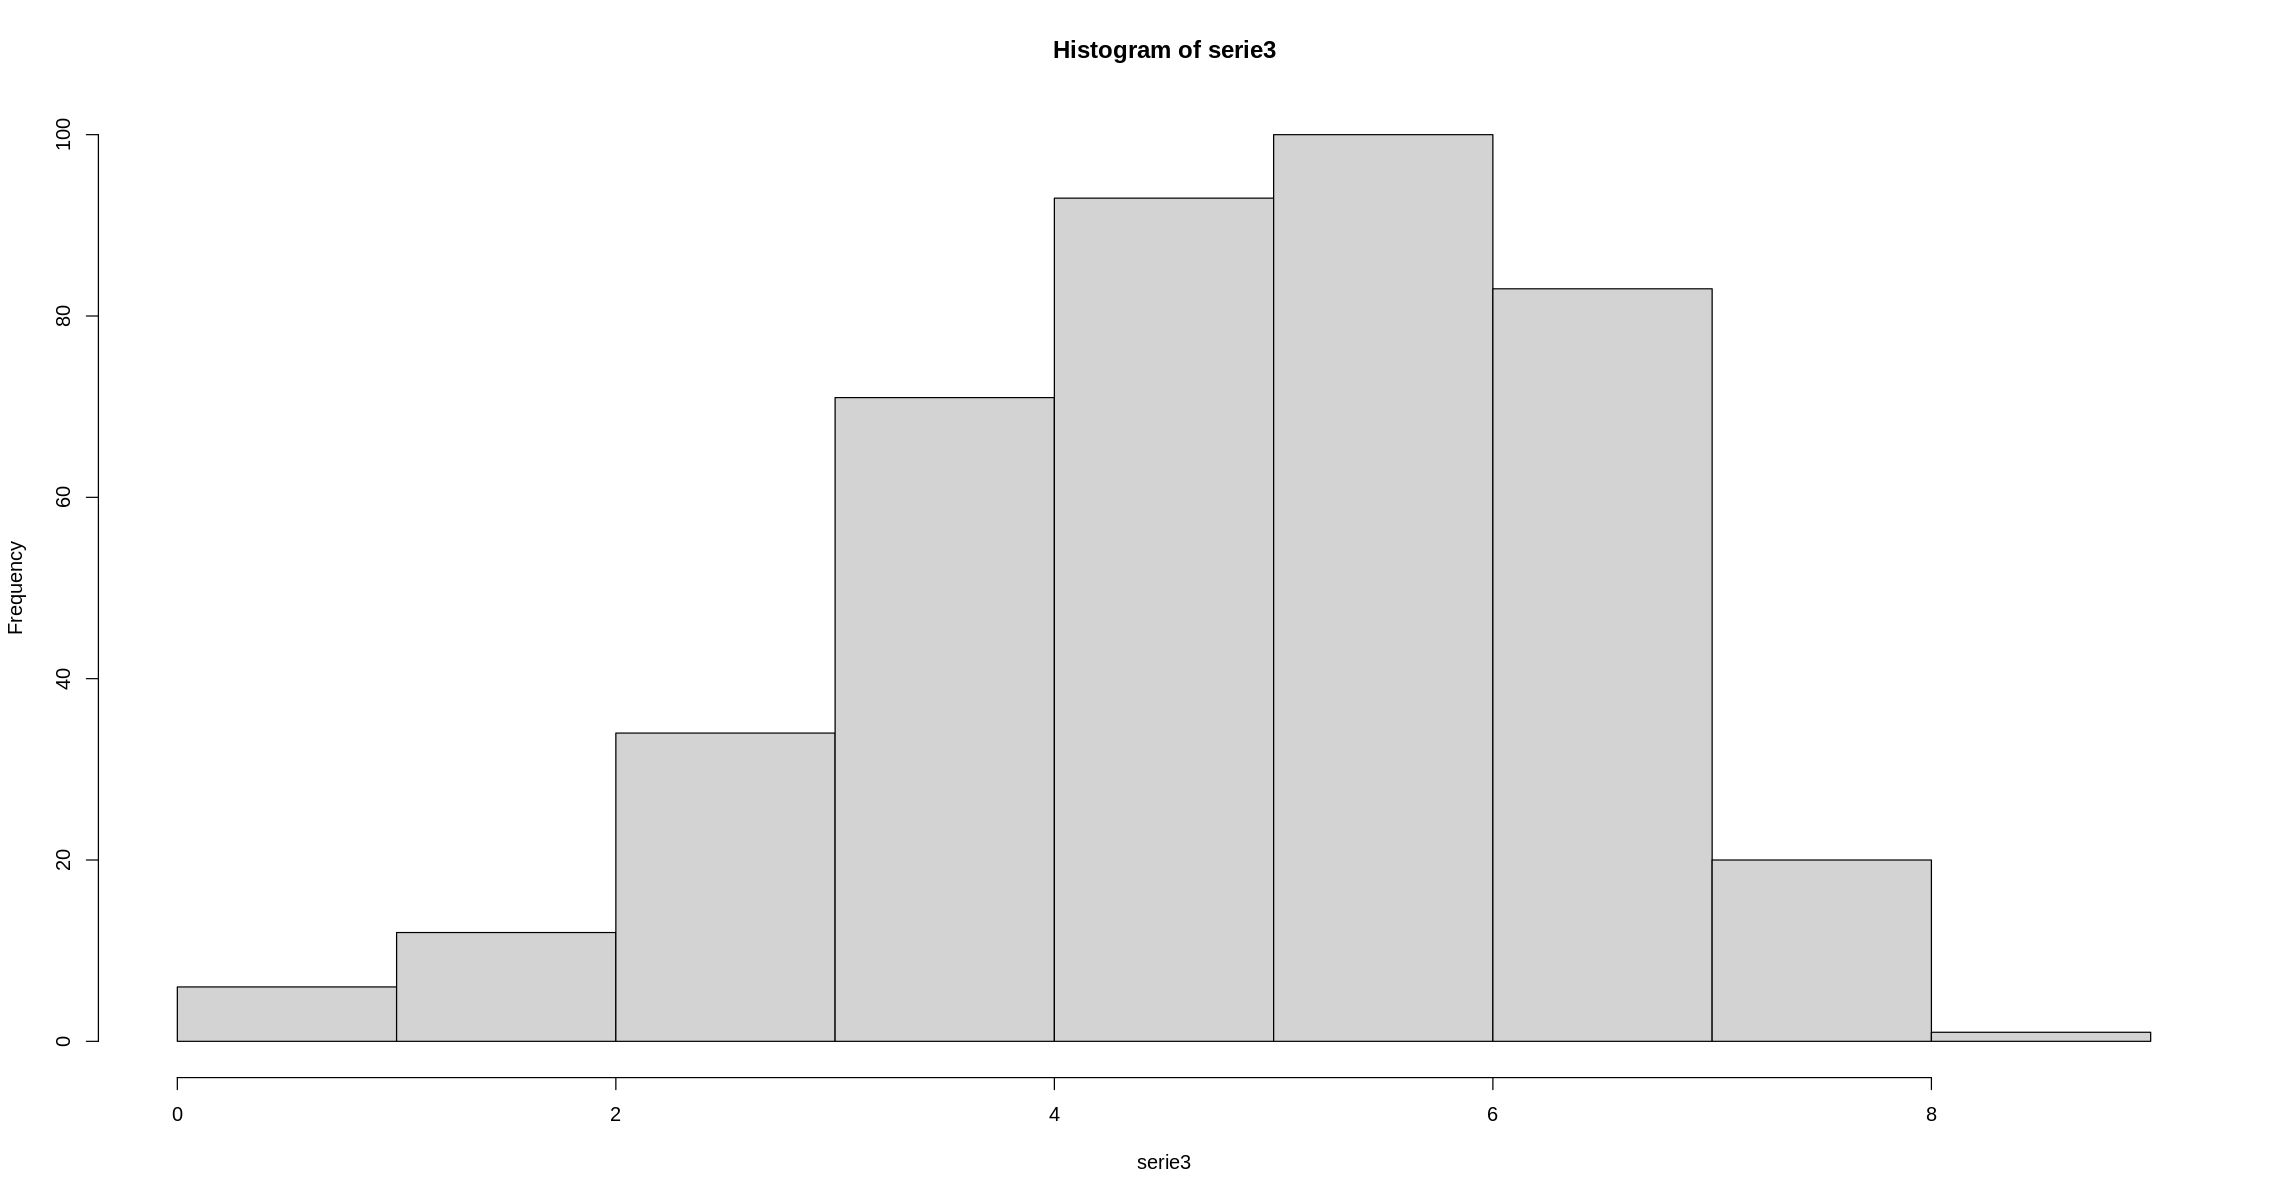

In [32]:
hist(serie2)
hist(serie3)

In [34]:
# Ho = distribuição normal : p > 0.05
# Ha = distribuição != normal : p <= 0.05
shapiro.test(serie3)


	Shapiro-Wilk normality test

data:  serie3
W = 0.97707, p-value = 3.419e-06


In [35]:
#a serie ainda não é normal, mesmo após as transforações

In [36]:
#VERIFICAÇÃO DA ESTACIONARIDADE DA SERIE
# Teste pp (Philips-Perron)

# Ho = é estacionária: p > 0.05
# Ha = não é estacionária: p <= 0.05
estacionaridade <-
  ur.pp(serie3)
summary(estacionaridade)


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3429 -0.7392  0.2180  1.0008  2.8520 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.38346    0.21261   11.21   <2e-16 ***
y.l1         0.50005    0.04245   11.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.342 on 417 degrees of freedom
Multiple R-squared:  0.2497,	Adjusted R-squared:  0.2479 
F-statistic: 138.8 on 1 and 417 DF,  p-value: < 2.2e-16


Value of test-statistic, type: Z-alpha  is: -204.2185 

         aux. Z statistics
Z-tau-mu           11.1158


In [ ]:
#A SÉRIE NÃO É ESTACIONÁRIA

In [37]:
#VERIFICAÇÃO DA QUANTIDADE DE DIFERENCIAÇÕES QUE PODEM SER REALIZADAS PARA
#TORNAR A SÉRIE ESTACIONÁRIA
ndiffs(serie3)

[1] 0

In [39]:
#desta forma, não há como tornar a série estacionária

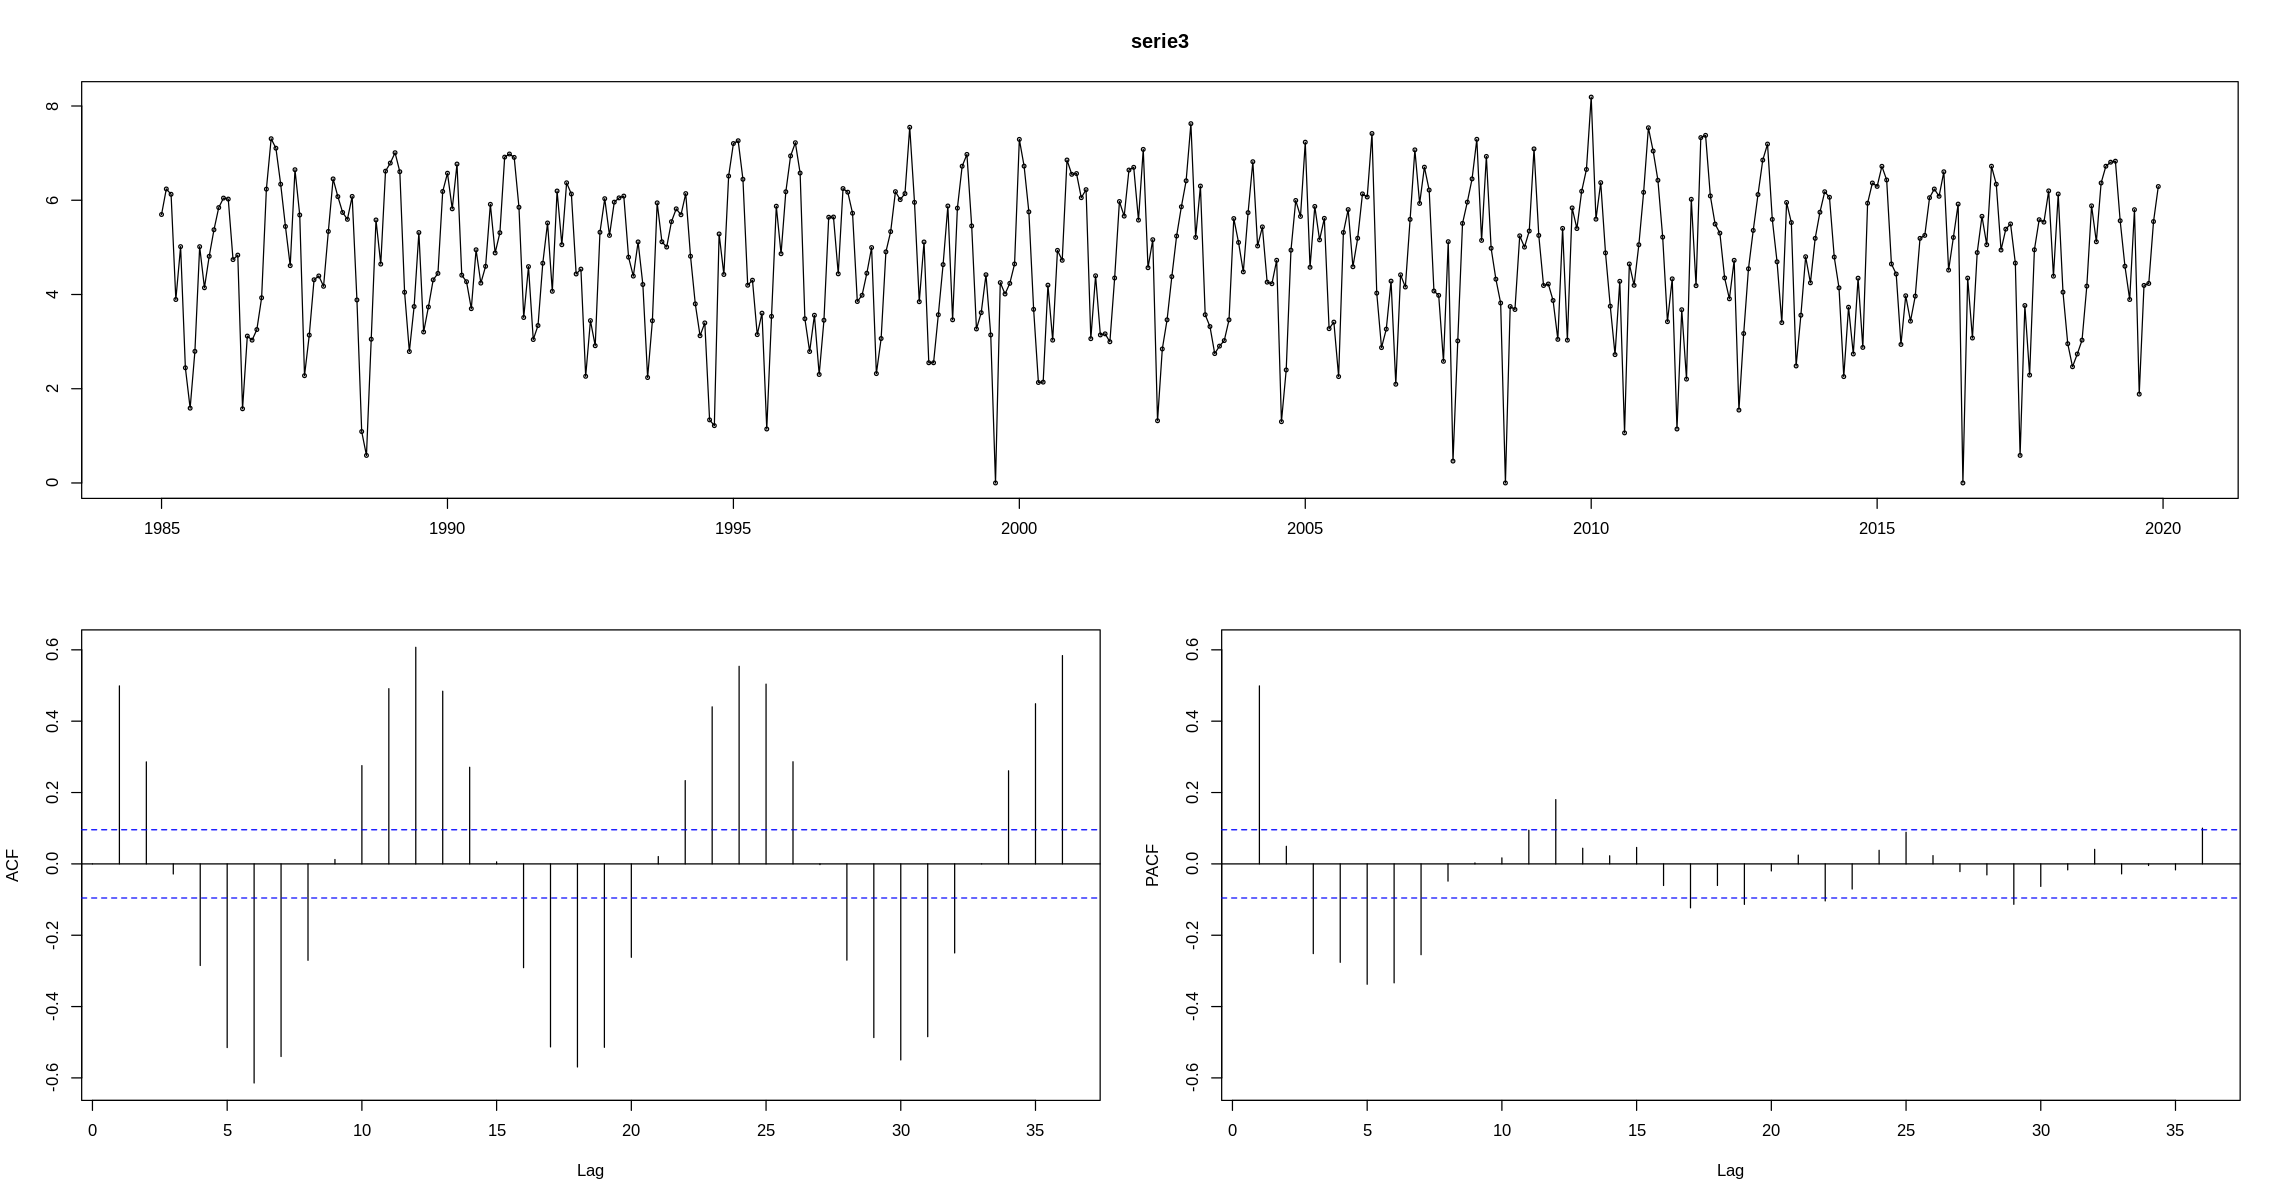

In [40]:
#AUTOCORRELAÇÃO
tsdisplay(serie3)

In [45]:
#gráficos de acf e pacf apresentando correlação entre os dados além de sazonalidade nos lags
#dados estã fora dos limites

In [42]:
# Teste de Autocorrelação (Ljung-Box)
# Ho = não é autocorrelacionado: p > 0.05
# Ha = é autocorrelacionado: p <= 0.05
Box.test(serie3, type = "Ljung-Box")


	Box-Ljung test

data:  serie3
X-squared = 105.28, df = 1, p-value < 2.2e-16


In [43]:
#pelo teste estatístico que os dados da série são autocorrelacionados

####5-CRIAÇÃO DOS MODELOS

####5.2-CRIAÇÃO DO AUTOARIMA

In [50]:
#UTILIZAÇÃO DO AUTOARIMA PARA IDENTIFICAR QUAL É O MELHOR MODELO A SER UTILIZADO
modelo_auto<-
  auto.arima(serie3,trace = T, stepwise = F,approximation = F,
  max.p = 5, max.q = 5, max.P = 2, max.Q = 2)


 ARIMA(0,0,0)(0,1,0)[12]                    : 1399.732
 ARIMA(0,0,0)(0,1,0)[12] with drift         : 1401.636
 ARIMA(0,0,0)(0,1,1)[12]                    : Inf
 ARIMA(0,0,0)(0,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(0,1,2)[12]                    : Inf
 ARIMA(0,0,0)(0,1,2)[12] with drift         : Inf
 ARIMA(0,0,0)(1,1,0)[12]                    : 1311.814
 ARIMA(0,0,0)(1,1,0)[12] with drift         : 1313.729
 ARIMA(0,0,0)(1,1,1)[12]                    : Inf
 ARIMA(0,0,0)(1,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(1,1,2)[12]                    : Inf
 ARIMA(0,0,0)(1,1,2)[12] with drift         : Inf
 ARIMA(0,0,0)(2,1,0)[12]                    : 1249.628
 ARIMA(0,0,0)(2,1,0)[12] with drift         : 1251.581
 ARIMA(0,0,0)(2,1,1)[12]                    : Inf
 ARIMA(0,0,0)(2,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(2,1,2)[12]                    : Inf
 ARIMA(0,0,0)(2,1,2)[12] with drift         : Inf
 ARIMA(0,0,1)(0,1,0)[12]                    : 1401.752
 ARIMA(0,0,1)(

In [51]:
summary(modelo_auto)

Series: serie3 
ARIMA(0,0,0)(2,1,0)[12] 

Coefficients:
         sar1     sar2
      -0.6271  -0.3972
s.e.   0.0463   0.0470

sigma^2 = 1.219:  log likelihood = -621.78
AIC=1249.57   AICc=1249.63   BIC=1261.6

Training set error measures:
                     ME     RMSE       MAE  MPE MAPE      MASE          ACF1
Training set 0.02227089 1.085663 0.8109607 -Inf  Inf 0.7872246 -0.0003012613

In [54]:
#AIC DE 1249 1.085663

In [52]:
#CRIANDO OUTRO MODELO
modelo_auto2<-
  auto.arima(serie3,trace = T, stepwise = F,approximation = F,
  max.p = 10, max.q = 10, max.P = 4, max.Q = 4)


 ARIMA(0,0,0)(0,1,0)[12]                    : 1399.732
 ARIMA(0,0,0)(0,1,0)[12] with drift         : 1401.636
 ARIMA(0,0,0)(0,1,1)[12]                    : Inf
 ARIMA(0,0,0)(0,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(0,1,2)[12]                    : Inf
 ARIMA(0,0,0)(0,1,2)[12] with drift         : Inf
 ARIMA(0,0,0)(0,1,3)[12]                    : Inf
 ARIMA(0,0,0)(0,1,3)[12] with drift         : Inf
 ARIMA(0,0,0)(0,1,4)[12]                    : Inf
 ARIMA(0,0,0)(0,1,4)[12] with drift         : Inf
 ARIMA(0,0,0)(1,1,0)[12]                    : 1311.814
 ARIMA(0,0,0)(1,1,0)[12] with drift         : 1313.729
 ARIMA(0,0,0)(1,1,1)[12]                    : Inf
 ARIMA(0,0,0)(1,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(1,1,2)[12]                    : Inf
 ARIMA(0,0,0)(1,1,2)[12] with drift         : Inf
 ARIMA(0,0,0)(1,1,3)[12]                    : Inf
 ARIMA(0,0,0)(1,1,3)[12] with drift         : Inf
 ARIMA(0,0,0)(1,1,4)[12]                    : Inf
 ARIMA(0,0,0)(1,1,4)[12] with

In [53]:
summary(modelo_auto2)

Series: serie3 
ARIMA(0,0,0)(4,1,0)[12] 

Coefficients:
         sar1     sar2     sar3     sar4
      -0.8066  -0.7214  -0.4660  -0.2607
s.e.   0.0494   0.0614   0.0612   0.0513

sigma^2 = 1.06:  log likelihood = -595.32
AIC=1200.64   AICc=1200.79   BIC=1220.7

Training set error measures:
                     ME     RMSE       MAE  MPE MAPE      MASE       ACF1
Training set 0.02568095 1.009727 0.7513902 -Inf  Inf 0.7293977 0.01897444

In [ ]:
#AIC 1200 E RMSE 1.009727

In [55]:
#SERÃO USADOS OS MODELOS ARIMA CRIADOS NO AUTOAARIMA
#ARIMA(0,0,0)(4,1,0)
#ARIMA(0,0,0)(2,1,0)



####5.1-CRIAÇÃO DO SARIMA
----MODELO SARIMA: (p,d,q)(P,D,Q)

In [46]:
modelo_sarima<-
  arima(serie3, order = c(0,0,0), seasonal = c(2,1,0))
  summary(modelo_sarima)


Call:
arima(x = serie3, order = c(0, 0, 0), seasonal = c(2, 1, 0))

Coefficients:
         sar1     sar2
      -0.6271  -0.3972
s.e.   0.0463   0.0470

sigma^2 estimated as 1.213:  log likelihood = -621.78,  aic = 1249.57

Training set error measures:
                     ME     RMSE       MAE  MPE MAPE      MASE          ACF1
Training set 0.02227089 1.085663 0.8109607 -Inf  Inf 0.6747757 -0.0003012613

In [ ]:
#AIC 1249

In [47]:
modelo_sarima2<-
  arima(serie3, order = c(0,0,0), seasonal = c(4,1,0))
  summary(modelo_sarima2)


Call:
arima(x = serie3, order = c(0, 0, 0), seasonal = c(4, 1, 0))

Coefficients:
         sar1     sar2     sar3     sar4
      -0.8066  -0.7214  -0.4660  -0.2607
s.e.   0.0494   0.0614   0.0612   0.0513

sigma^2 estimated as 1.05:  log likelihood = -595.32,  aic = 1200.64

Training set error measures:
                     ME     RMSE       MAE  MPE MAPE     MASE       ACF1
Training set 0.02568095 1.009727 0.7513902 -Inf  Inf 0.625209 0.01897444

In [49]:
#AIC 1200

In [48]:
# O MODELO SARIMA 2 POSSUEM OS VALORES DE AIC E RMSE MELHORES QUE O MODELO 1


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0)(2,1,0)[12]
Q* = 36.572, df = 22, p-value = 0.02635

Model df: 2.   Total lags used: 24



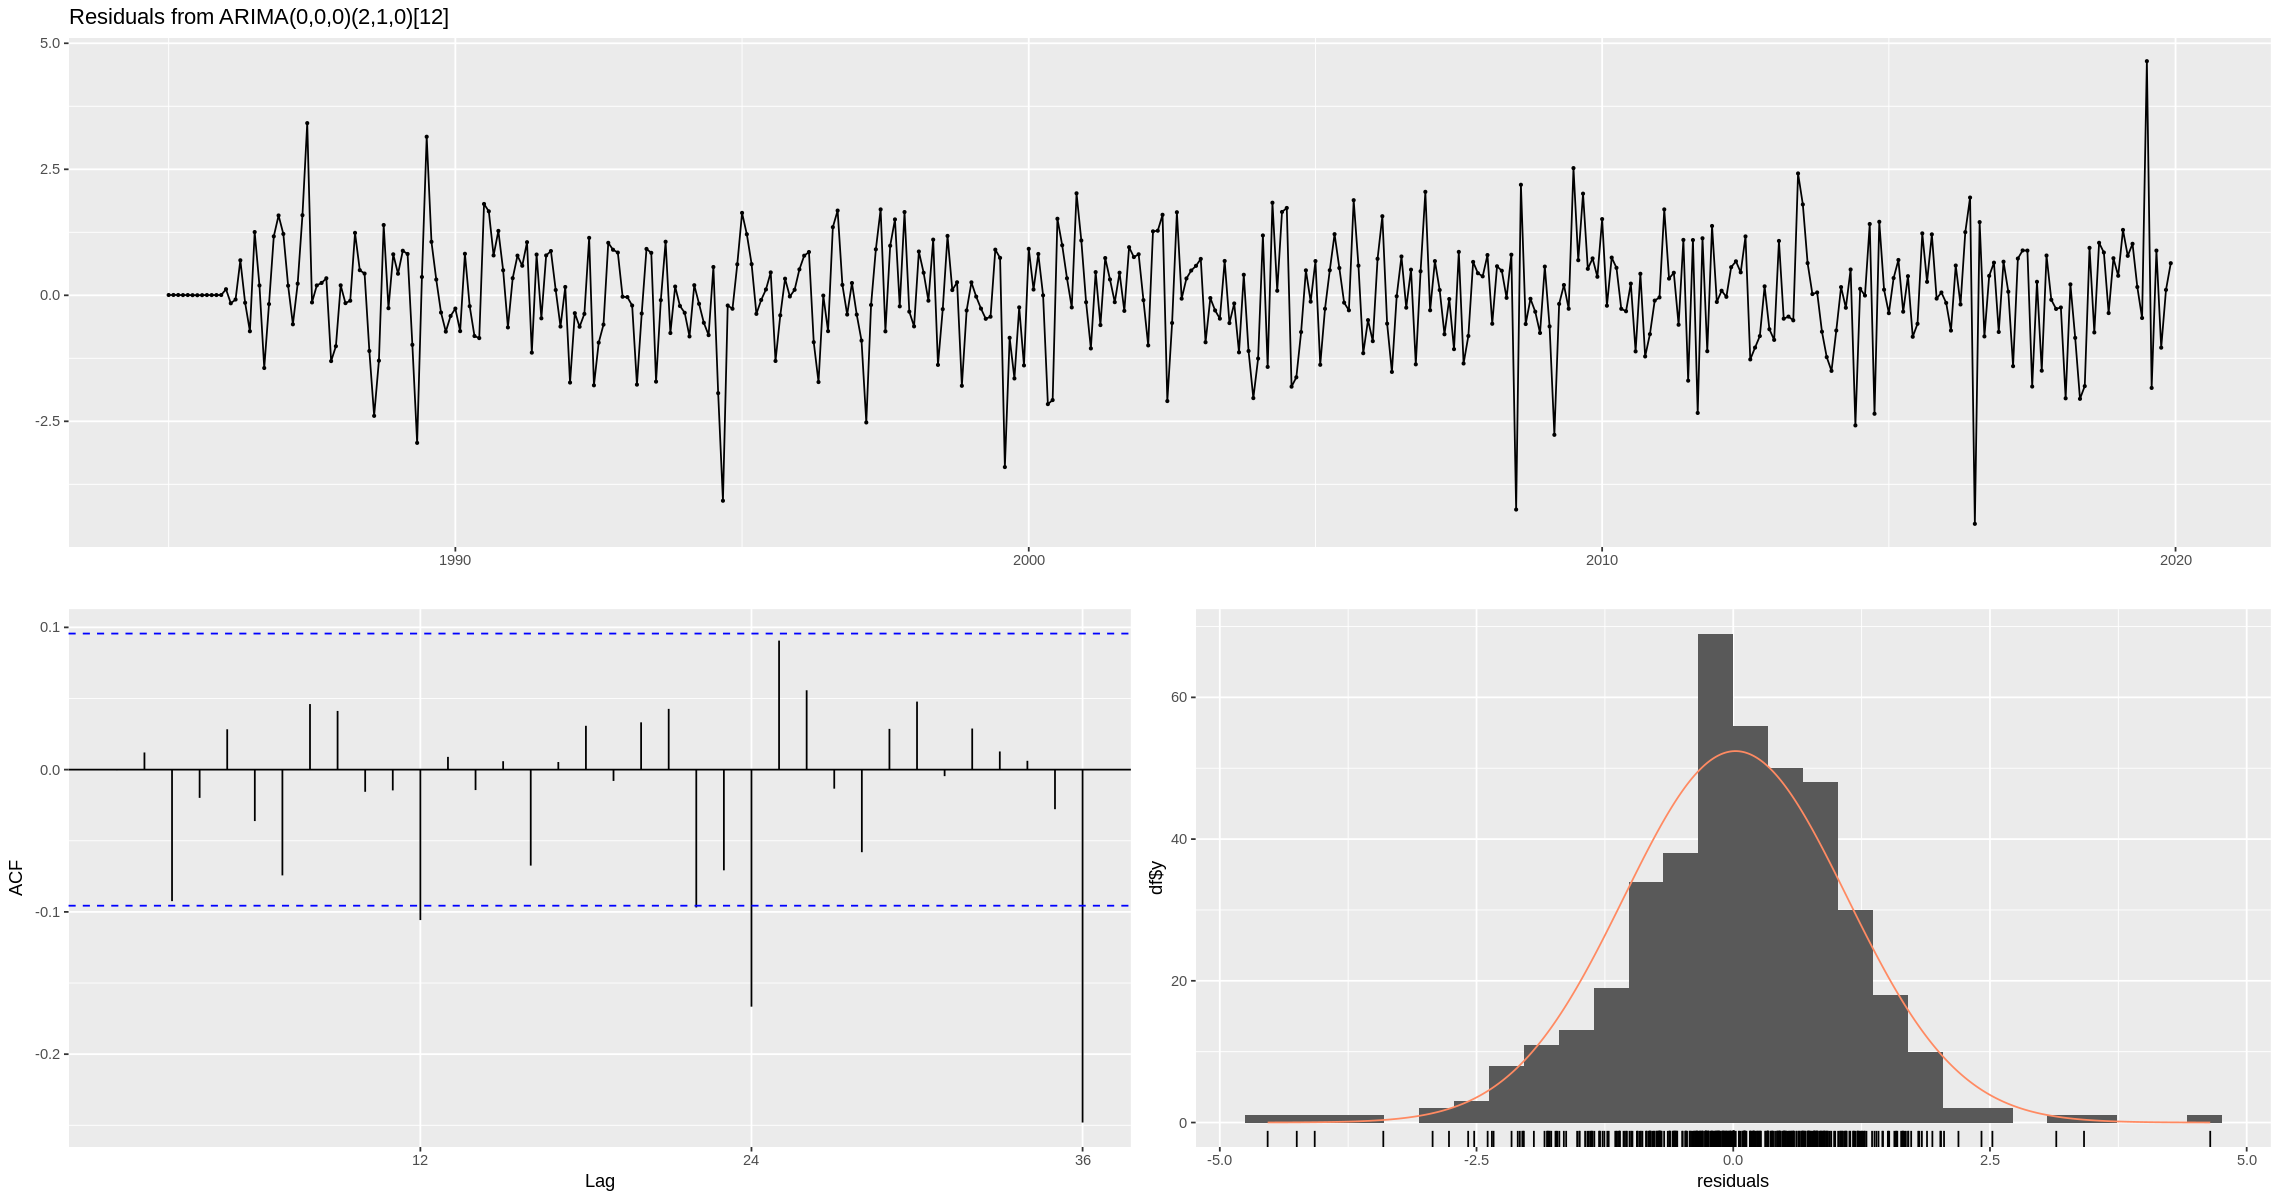

In [56]:
#ANÁLISE DOS RESÍDUOS
checkresiduals(modelo_sarima)


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0)(4,1,0)[12]
Q* = 23.733, df = 20, p-value = 0.2542

Model df: 4.   Total lags used: 24



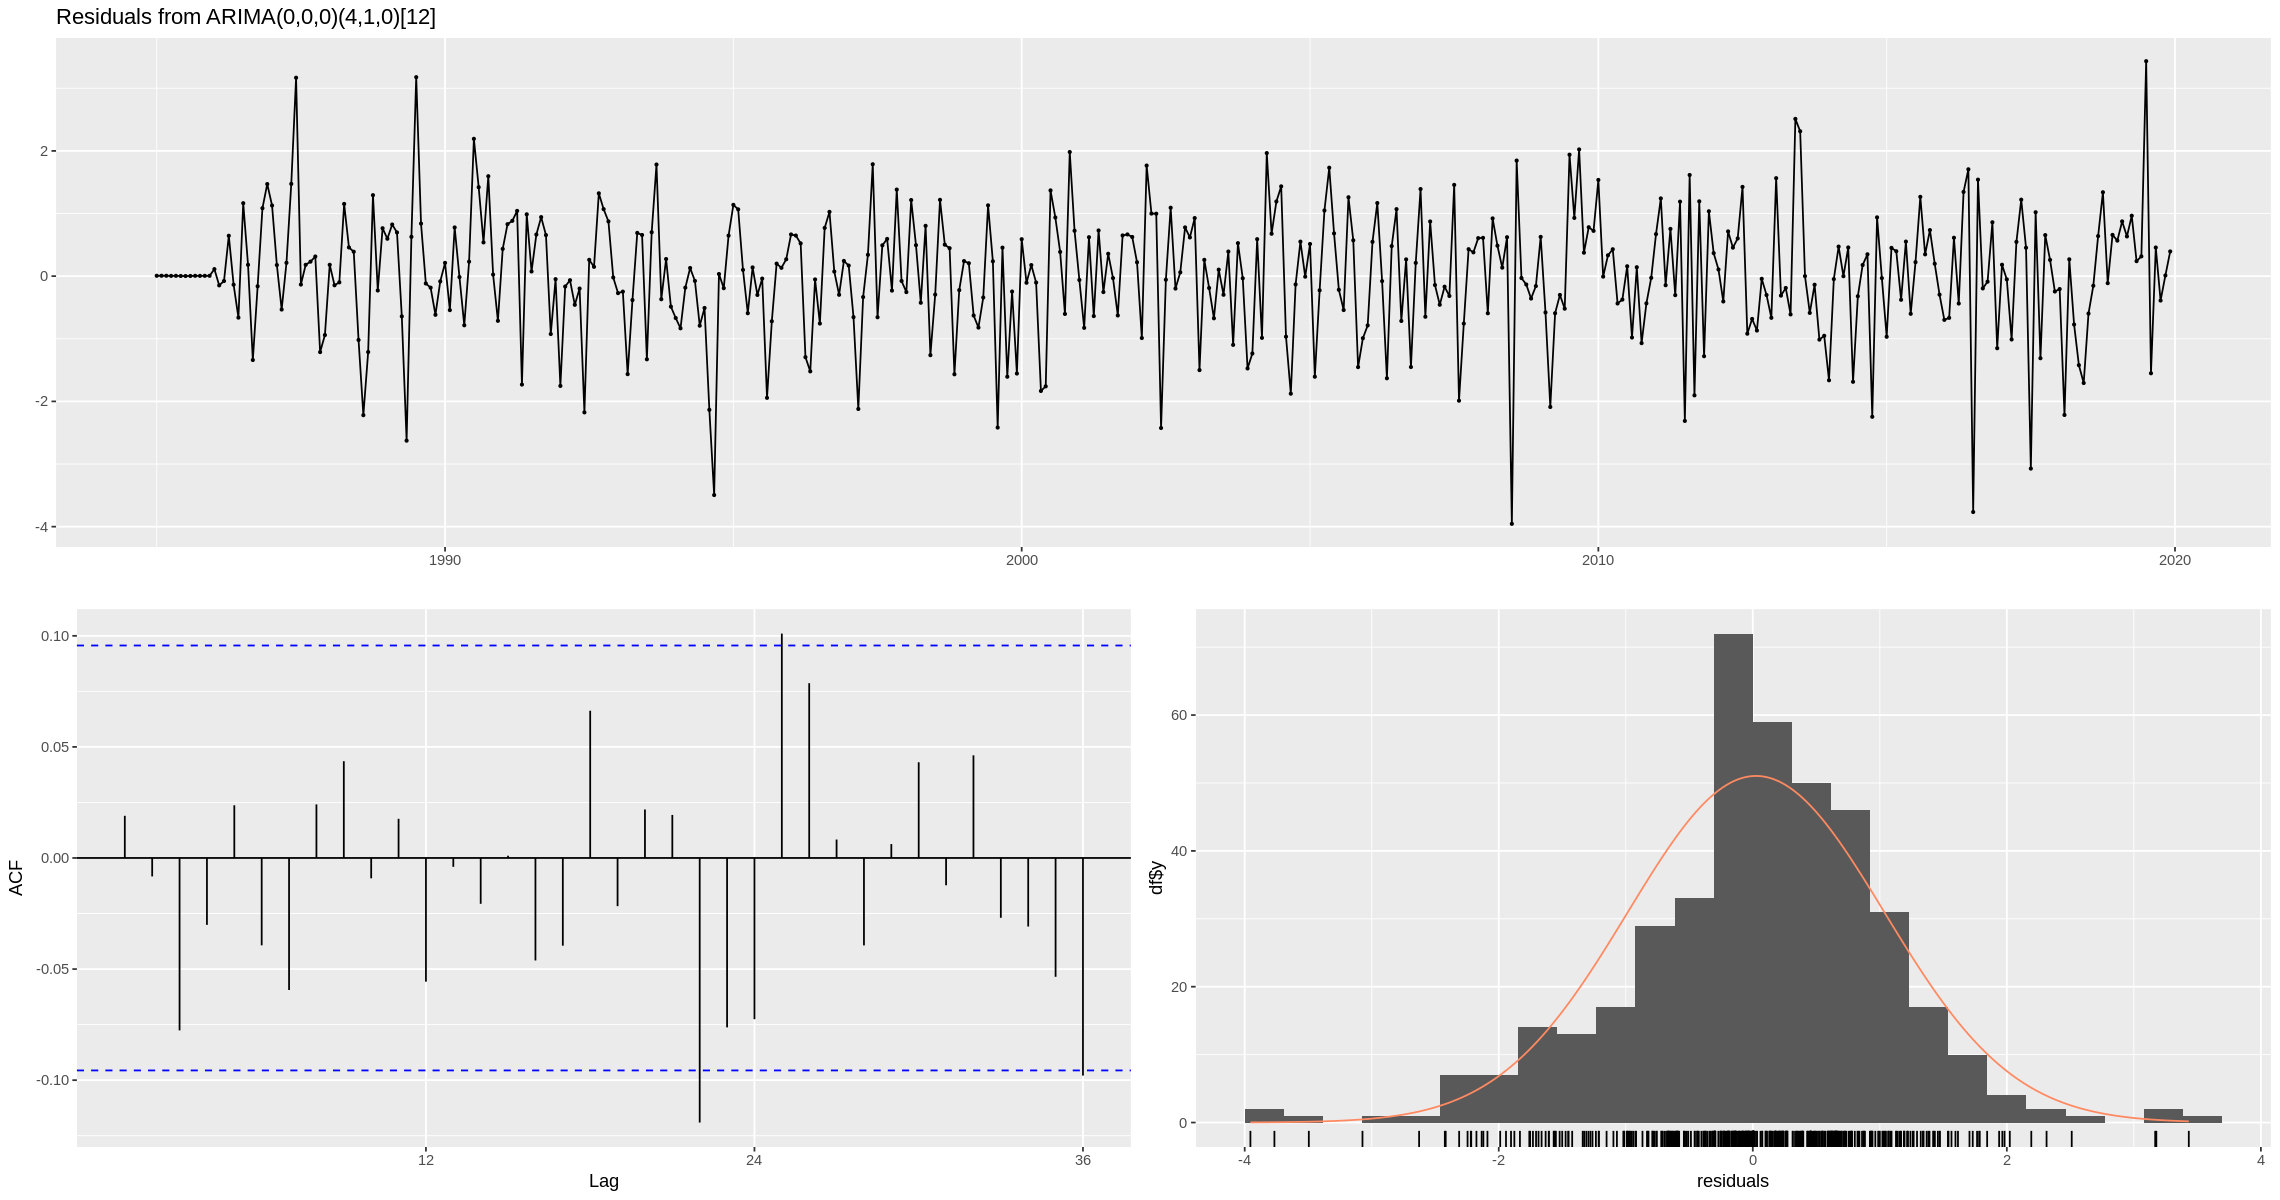

In [57]:
#ANÁLISE DOS RESÍDUOS
checkresiduals(modelo_sarima2)

In [59]:
#EM AMBOS MODELOS A MÉDIA É APROXIMADAMENTE 0

In [60]:
#A VARIÂNCIA APARENTEMENTE SE APRESETA CONSTANTE

In [61]:
#EM AMBOS MODELOS HÁ RESÍDUOS FORA DO LIMITE
#CONTUDO, EM GRANDE PARTE OS RESÍDUOS NÃO ESTÃO AUTOCORRELACIONADOS

In [62]:
# Ho = distribuição normal : p > 0.05
# Ha = distribuição != normal : p <= 0.05
shapiro.test(resid(modelo_sarima))


	Shapiro-Wilk normality test

data:  resid(modelo_sarima)
W = 0.97382, p-value = 7.383e-07


In [64]:
shapiro.test(resid(modelo_sarima2))


	Shapiro-Wilk normality test

data:  resid(modelo_sarima2)
W = 0.97684, p-value = 3.057e-06


In [65]:
#EM AMBOS CASOS OS RESÍDUOS NÃO NÃO NORMAIS

In [66]:
#APESAR DISSO, OS 2 MODELOS PODEM SER UTILIZADOS

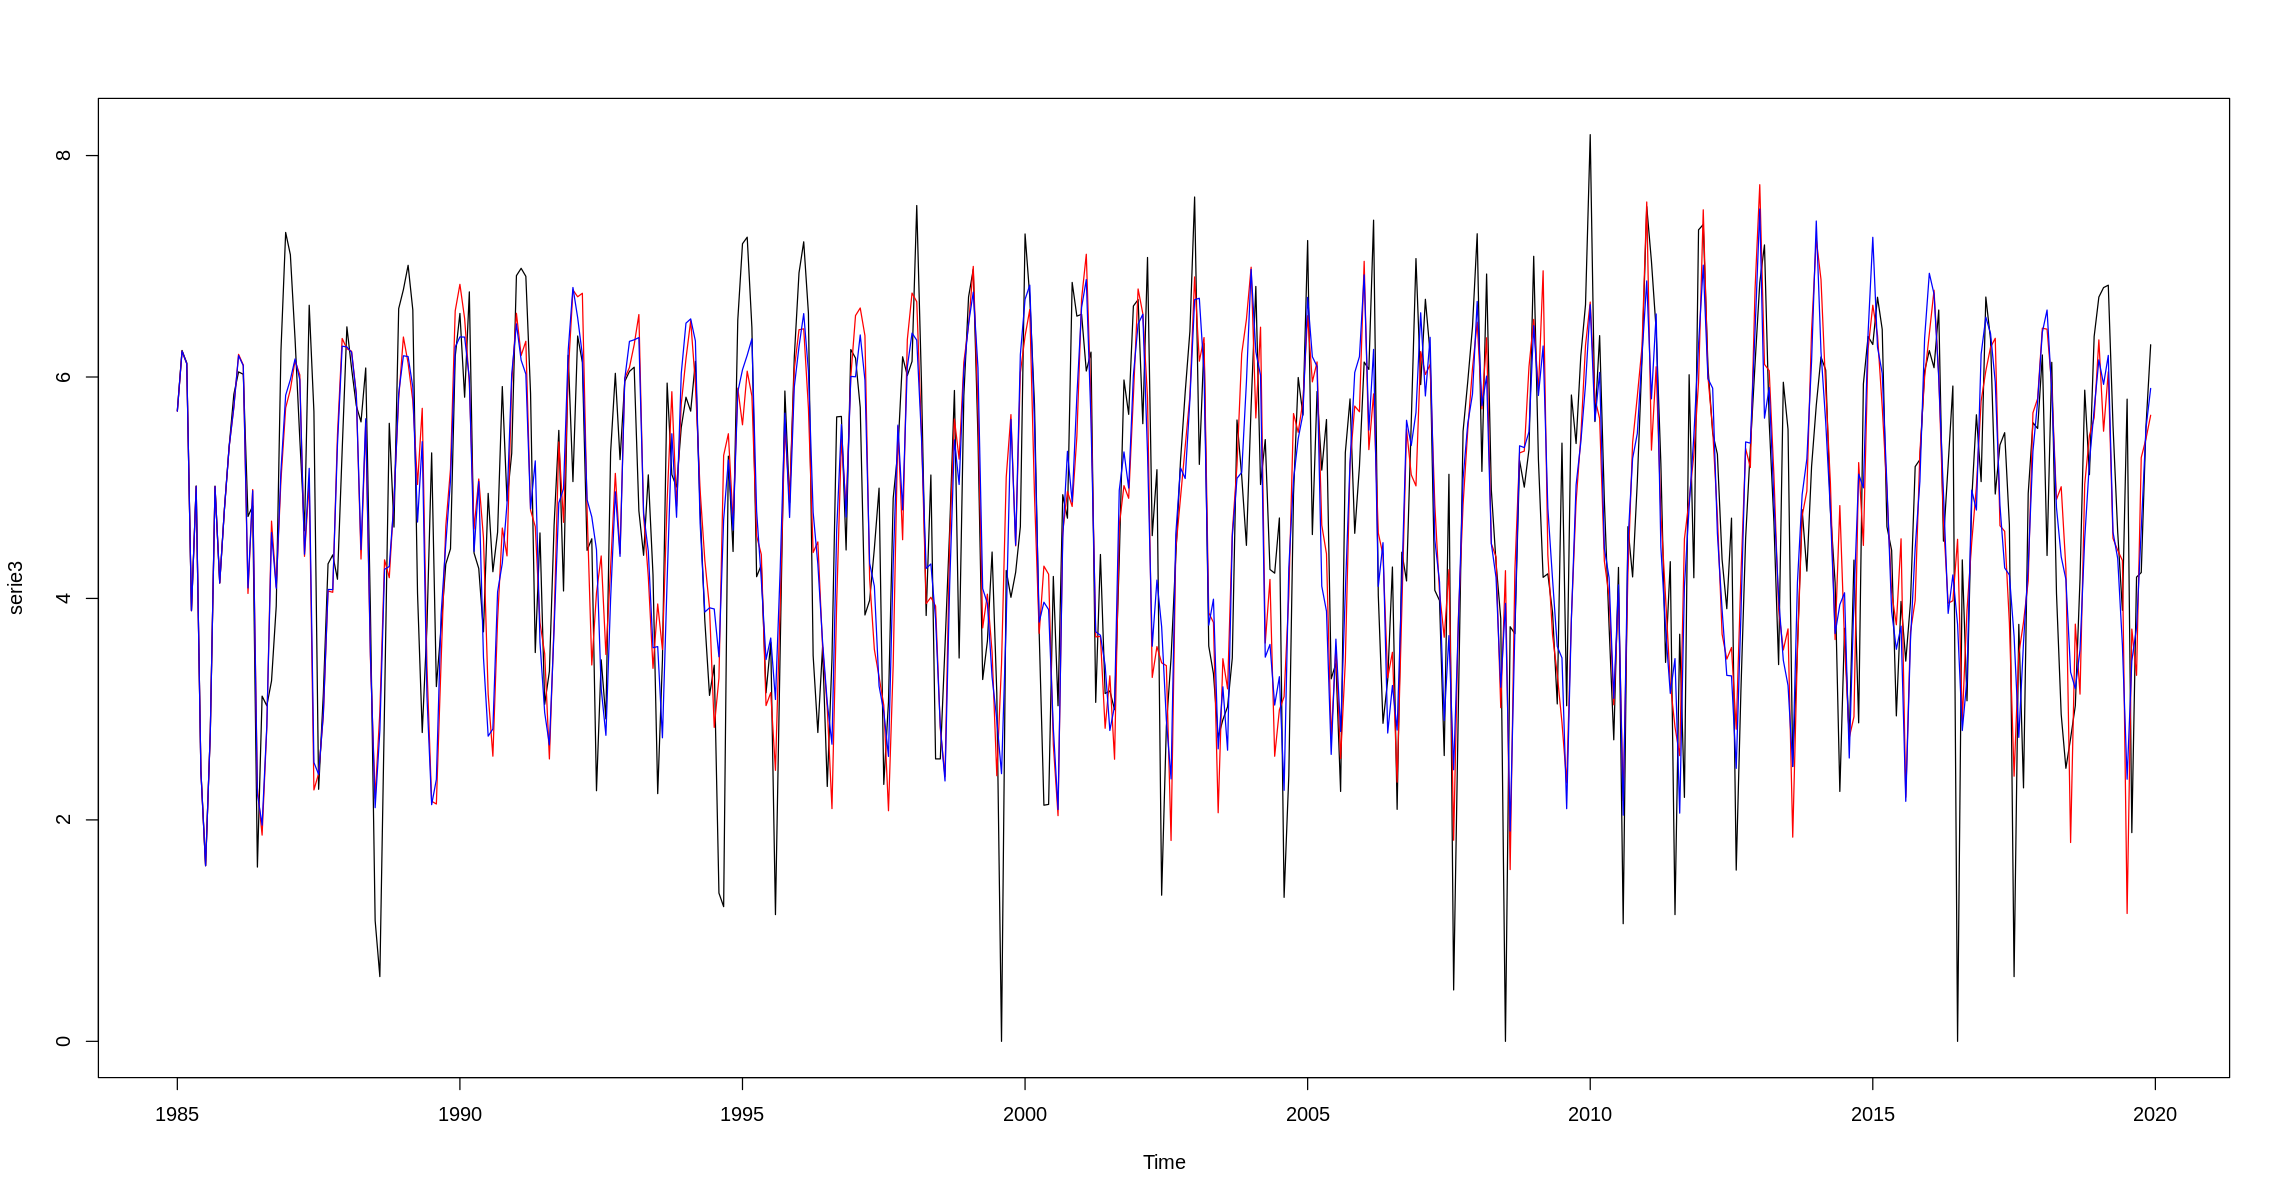

In [68]:
plot(serie3)
lines(serie3-modelo_sarima$resid, col='red')
lines(serie3-modelo_sarima2$resid, col='blue')

####6-CRIAÇÃO DAS PREVISÕES

In [ ]:
#CRIAÇÃO DAS PREVISÕES DOS MODELOS PARAR OS ANOS DE 2020,2021 E 2022
#H=36

####6.1-PREVISÃO - MODELO 1

In [69]:
#fazendo a previsão da serie
previsao <-
  forecast(modelo_sarima,h=36)

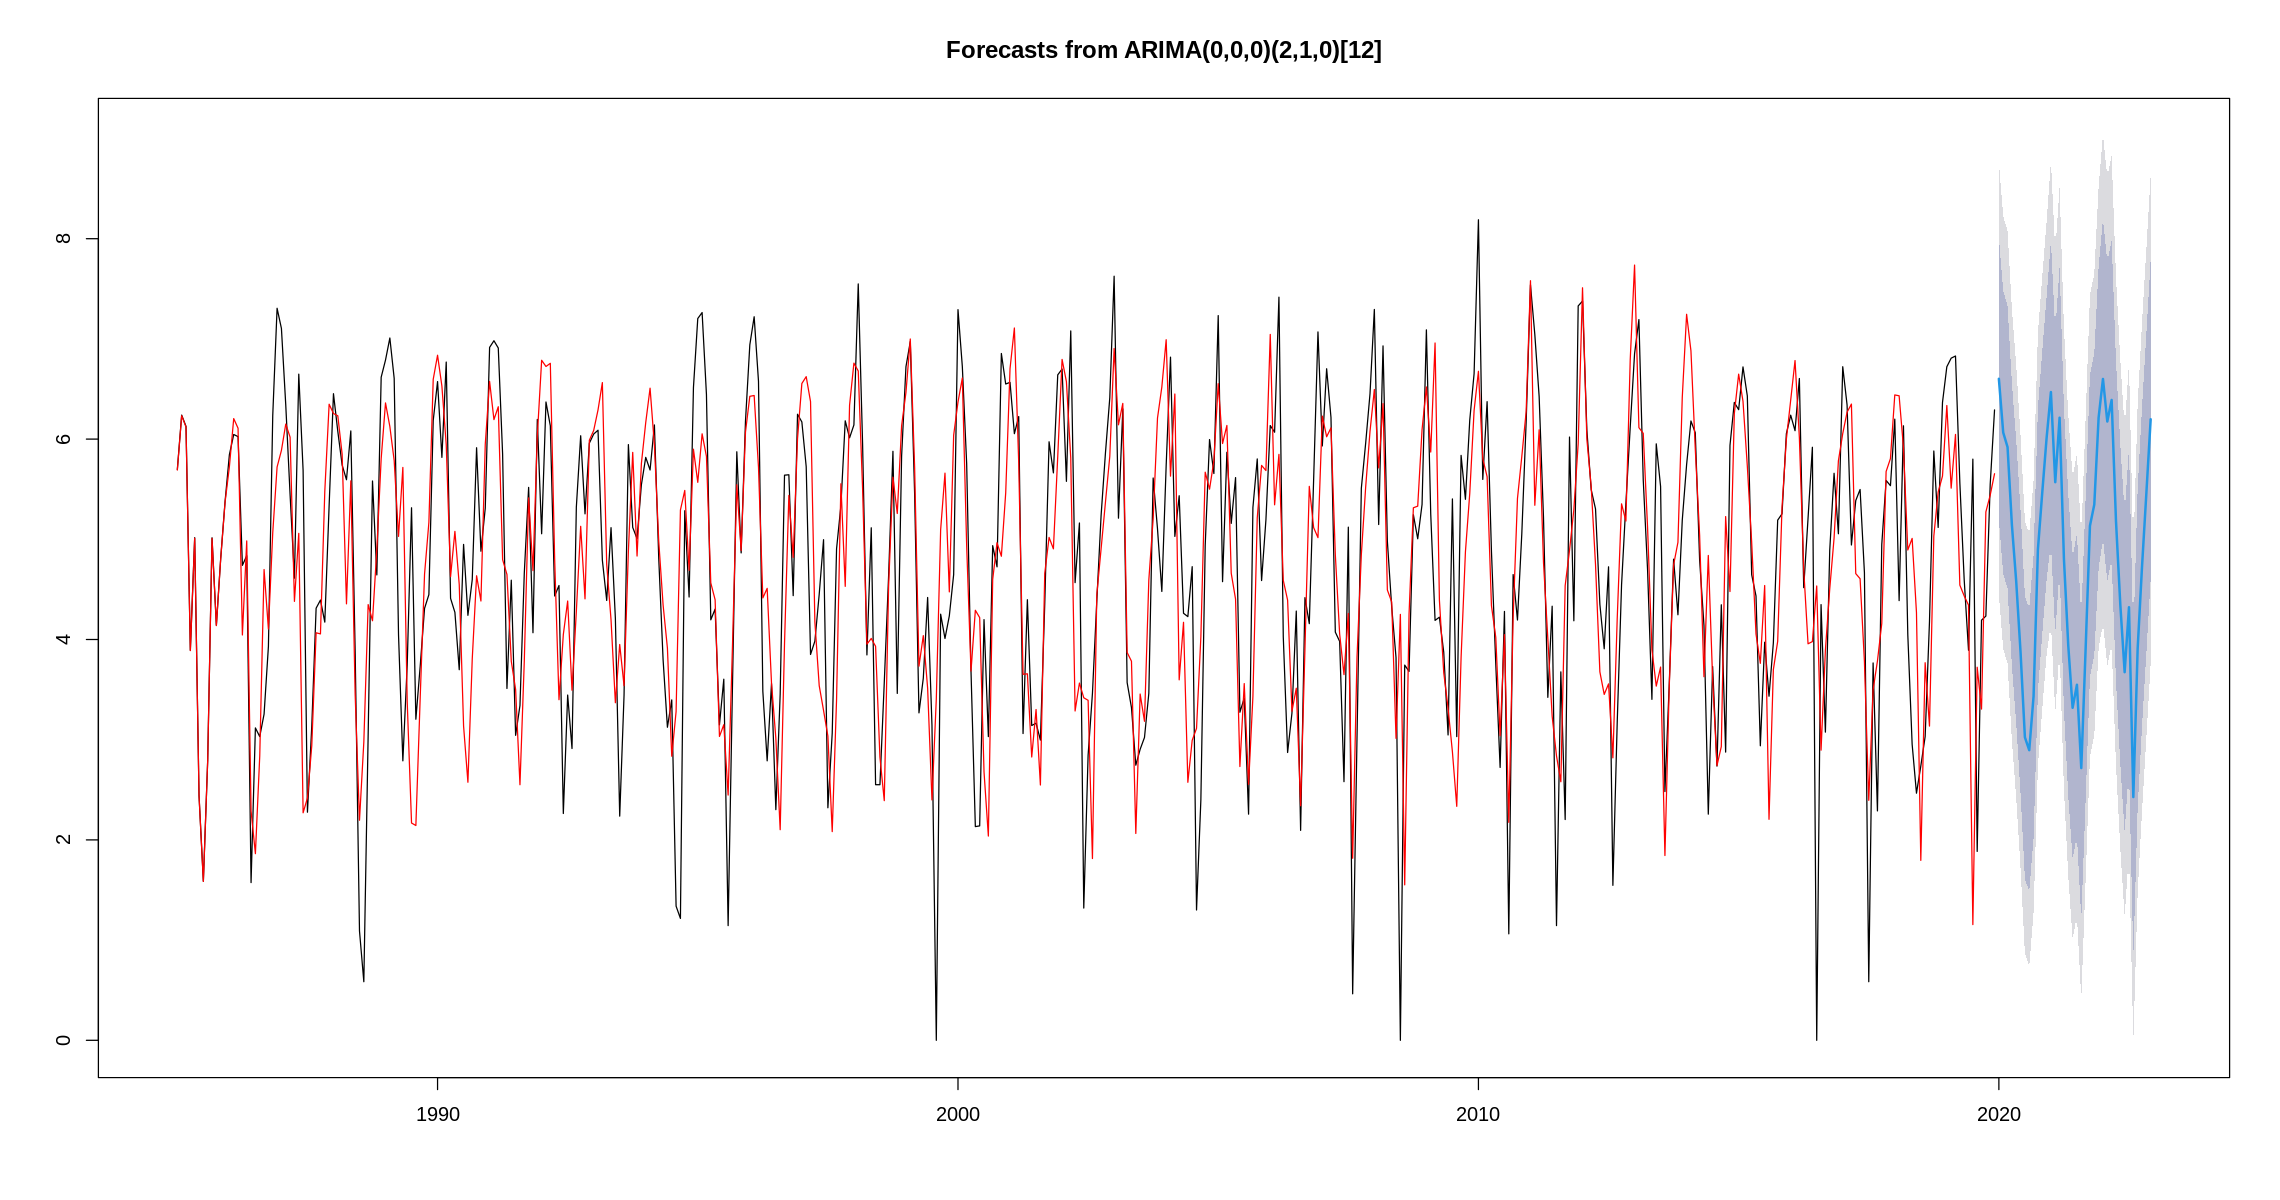

In [110]:
plot(previsao)
lines(serie3-modelo_sarima$resid, col= "red")

In [71]:
#CRIAÇÃO DA PREVISÃO
prev_escala <-
  as.data.frame(previsao)^3
View(prev_escala)

,Point Forecast,Lo 80,Hi 80,Lo 95,Hi 95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Jan 2020,287.72679,139.8080533,514.57927,8.769645e+01,672.3805
Feb 2020,223.15722,100.7982190,418.03874,5.962186e+01,556.3203
Mar 2020,207.47301,91.6324983,394.09557,5.320228e+01,527.3006
Apr 2020,136.22717,52.0530205,281.92239,2.663712e+01,389.7129
May 2020,95.92556,31.7354082,214.84849,1.415049e+01,305.7187
Jun 2020,58.04809,14.8923932,147.49856,5.026755e+00,219.3513
Jul 2020,27.65879,4.1932067,87.28315,6.478394e-01,139.2439
Aug 2020,24.27802,3.2678104,79.90929,3.997762e-01,129.1338
Sep 2020,40.46905,8.2622789,113.72554,2.069464e+00,174.8826


In [72]:
#PREVISÃO 2021-2022
prev_escala1 <-
  prev_escala[ , 1]
print(prev_escala1)

 [1] 287.72679 223.15722 207.47301 136.22717  95.92556  58.04809  27.65879
 [8]  24.27802  40.46905 117.40906 163.20576 216.88830 270.76891 172.81360
[15] 239.88679 111.04264  61.07774  36.54432  44.68020  20.05743  59.47740
[22] 135.41568 152.82969 240.11210 287.52418 235.51968 260.98109 139.43595
[29]  82.19225  49.59052  80.73687  14.30860  59.78482 105.31461 162.22449
[36] 238.08183


In [101]:
#DADOS REAIS
chuva_mensal

Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1985,"184,9","242,9",230,59.00,126.20,"14,6",4.00,"21,8","126,1","71,1","111,3","155,2"
1986,"199,6",221,"218,7",106.50,113.10,"3,9",30.30,---,"34,5","60,7","242,5","389,9"
1987,"525,8",---,"161,3",98.10,293.80,"183,9",11.80,"30,9","80,2","84,8","72,7","152,1"
1988,"268,7","224,4","189,2",175.10,224.90,"58,6",1.30,"0,2","28,4","173,9","100,2","289,8"
1989,"312,9","344,3","288,2",66.30,21.70,"52,5",150.10,"32,9","52,1","80,1",88,"236,7"
1990,"284,1","196,9","310,1",85.80,77.90,"50,6",121.20,"76,3","97,2","206,8","116,3","149,8"
1991,"330,7","340,3","522,4",200.30,43.30,"96,8",28.20,"37,3","101,4",168,"67,3","237,9"
1992,"129,2","258,5",---,87.20,93.50,"11,6",40.90,"24,7","150,6","219,6",---,"211,7"
1993,"221,5","225,7",110,84.60,133.90,"74,7",11.20,"40,8","210,1","134,1","125,5","170,5"


In [105]:
#DADOS REAIS DOS ANOS DE 2021,22 E 23
#TRANSFORMANDO A SERIE REAL
dados_reais<-
chuva_mensal %>%
  filter(Ano=='2023'|Ano=='2022'|Ano=='2021') %>%
   mutate(across(where(is.character),~ as.numeric(gsub(",",".",.)))) %>%
     mutate(across(
where(is.numeric),
~ifelse(is.na(.),mean(.,na.rm = TRUE),.)
))

Warning message:
“There were 5 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(where(is.character), ~as.numeric(gsub(",", ".", .)))`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 4 remaining warnings.”


In [106]:
dados_reais

Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021,373.3,174.1,137.8,55.7,38.5,15.5,38.0,44.8,131.3,152.80,108.20,247.4
2022,418.4,136.3,233.6,40.4,67.3,45.9,8.8,35.2,131.3,117.30,197.70,200.4
2023,377.6,452.0,138.2,165.7,43.3,85.2,15.0,40.0,131.3,135.05,152.95,223.9


In [107]:
serie_real<-
  as.vector(t(dados_reais))
print(serie_real)

 [1] 2021.00  373.30  174.10  137.80   55.70   38.50   15.50   38.00   44.80
[10]  131.30  152.80  108.20  247.40 2022.00  418.40  136.30  233.60   40.40
[19]   67.30   45.90    8.80   35.20  131.30  117.30  197.70  200.40 2023.00
[28]  377.60  452.00  138.20  165.70   43.30   85.20   15.00   40.00  131.30
[37]  135.05  152.95  223.90


In [108]:
# Raiz do erro quadrático médio DO MODELO 1
rmse1 <-
  sqrt(mean((prev_escala1 - serie_real) ** 2))
print(rmse1)

Warning message in prev_escala1 - serie_real:
“longer object length is not a multiple of shorter object length”


[1] 504.8757


####6.2-PREVISÃO - MODELO 2

In [109]:
#fazendo a previsão da serie
previsao2 <-
  forecast(modelo_sarima2,h=36)

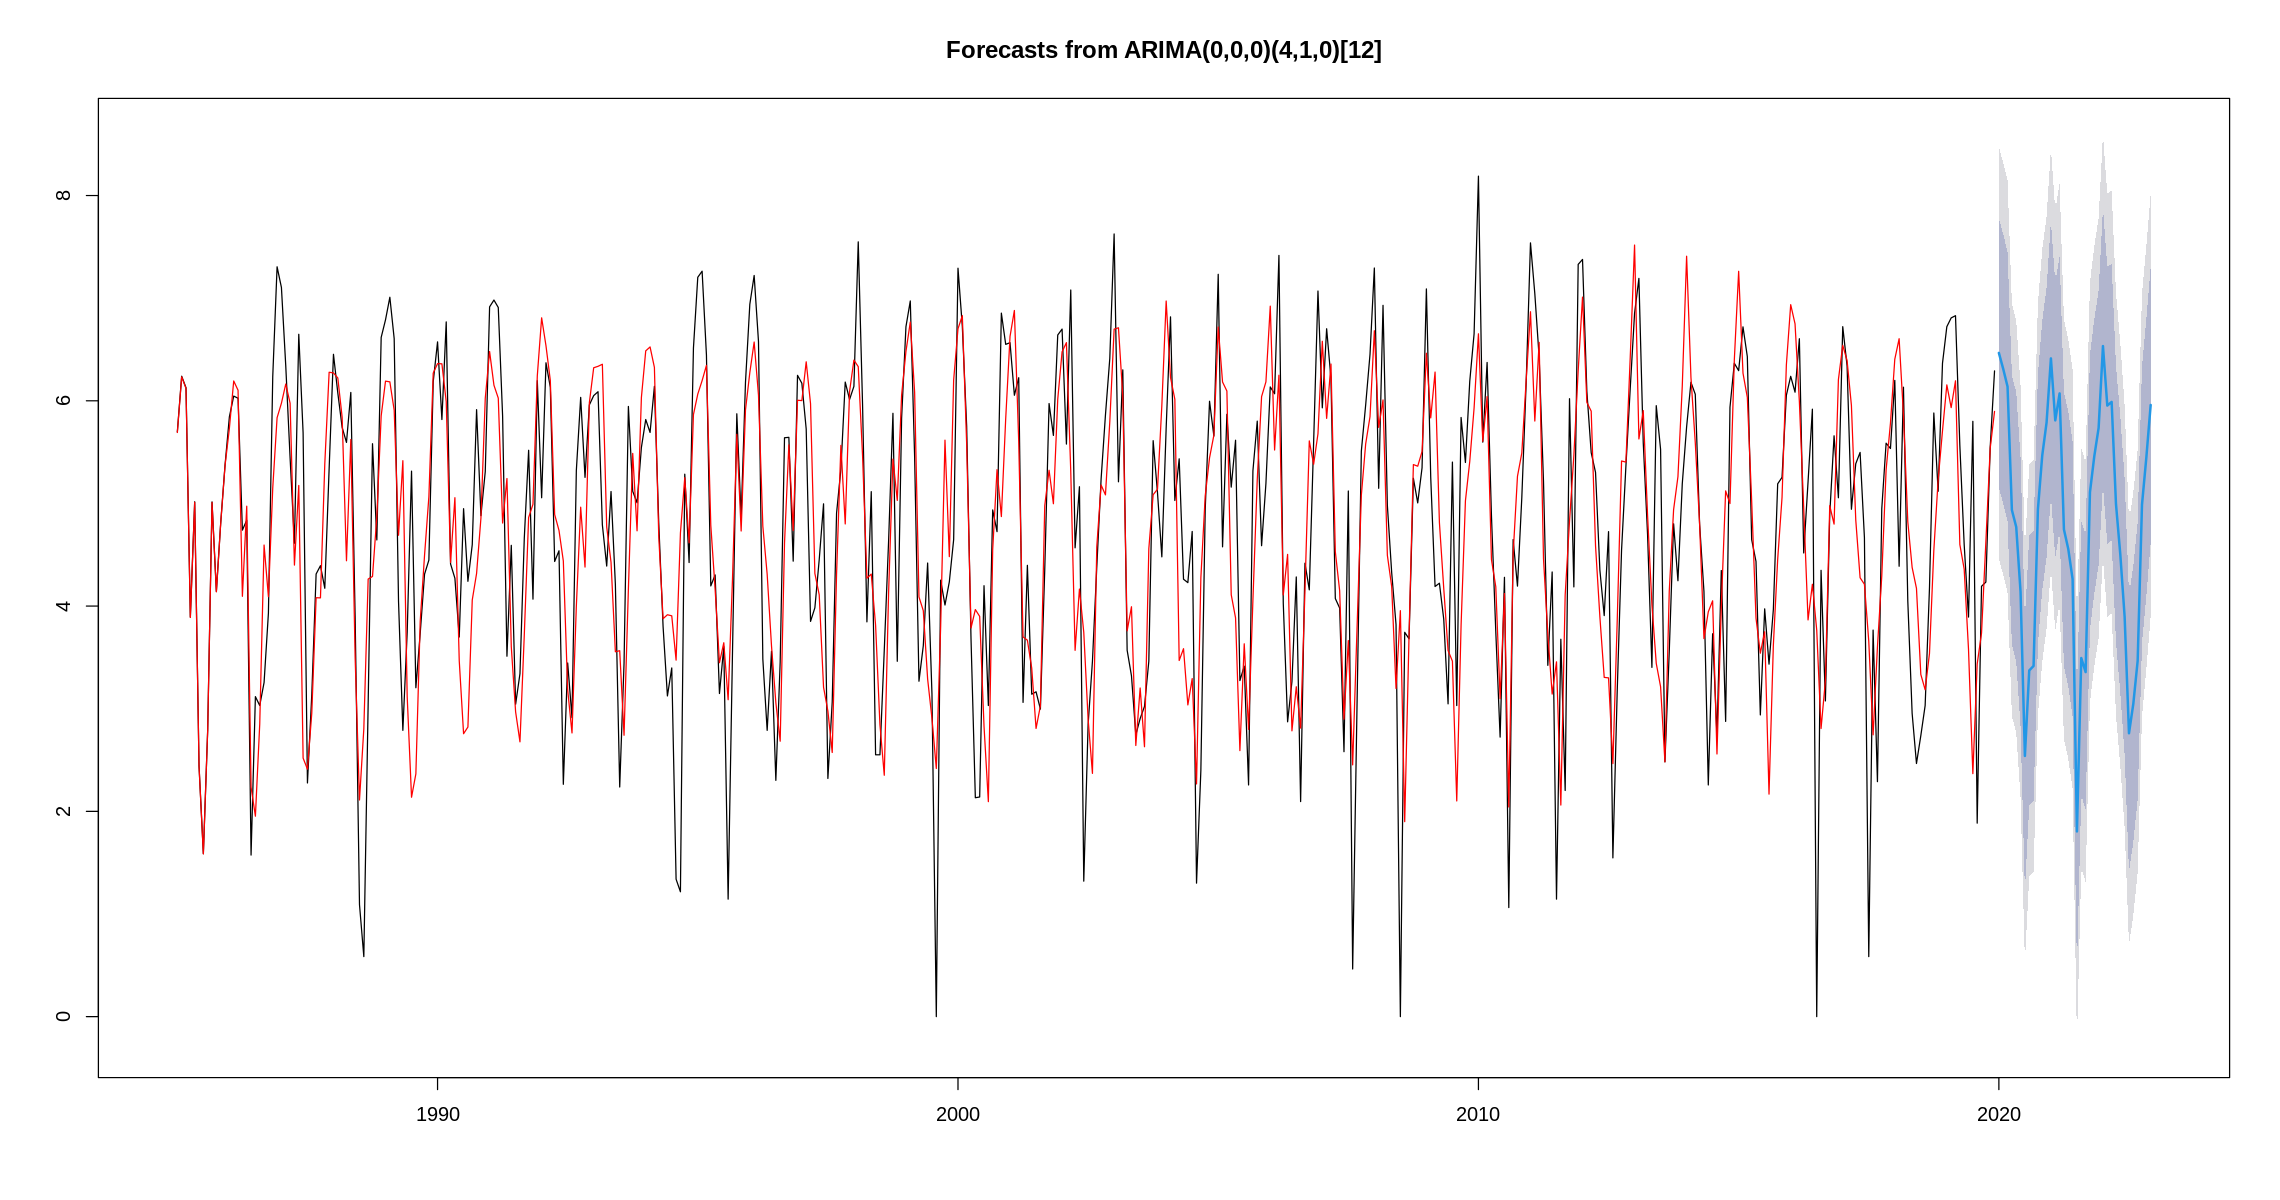

In [112]:
plot(previsao2)
lines(serie3-modelo_sarima2$resid, col= "red")

In [113]:
#CRIAÇÃO DA PREVISÃO
prev_escala2 <-
  as.data.frame(previsao2)^3
View(prev_escala2)

,Point Forecast,Lo 80,Hi 80,Lo 95,Hi 95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Jan 2020,270.406095,136.8802842,470.81126,88.63439718,608.60637
Feb 2020,251.329585,124.8384594,443.08883,79.66428444,575.65484
Mar 2020,231.278261,112.3532549,413.68735,70.46216388,540.58151
Apr 2020,120.264276,47.5612526,244.01766,25.10543825,334.82820
May 2020,108.586736,41.3464828,225.16847,21.09073158,311.49081
Jun 2020,70.765818,22.5058327,161.80452,9.64102675,231.94860
Jul 2020,16.385607,1.8473591,57.19269,0.15057304,94.06256
Aug 2020,38.359249,8.7370899,102.86142,2.54116254,155.76052
Sep 2020,39.892281,9.3136366,105.80954,2.79701966,159.64339


In [114]:
#PREVISÃO 2021-2022
prev_escala2<-
  prev_escala2[ , 1]
print(prev_escala2)

 [1] 270.406095 251.329585 231.278261 120.264276 108.586736  70.765818
 [7]  16.385607  38.359249  39.892281 120.624376 163.447281 194.002299
[13] 263.747877 196.035699 223.850087 106.947088  94.575702  77.444861
[19]   5.874351  42.641905  37.822184 133.351265 162.743459 188.704403
[25] 278.840415 211.010052 214.831600 124.644539  91.238771  59.033341
[31]  21.042954  28.332454  41.623954 124.105175 161.533174 211.636533


In [115]:
# Raiz do erro quadrático médio DO MODELO 1
rmse2 <-
  sqrt(mean((prev_escala2 - serie_real) ** 2))
print(rmse2)

Warning message in prev_escala2 - serie_real:
“longer object length is not a multiple of shorter object length”


[1] 508.1252


In [118]:
# Desvio padrão do erro absoluto
mean(abs(prev_escala1 - serie_real))
sd(abs(prev_escala1 - serie_real))


Warning message in prev_escala1 - serie_real:
“longer object length is not a multiple of shorter object length”


[1] 205.6225

Warning message in prev_escala1 - serie_real:
“longer object length is not a multiple of shorter object length”


[1] 467.1339

In [117]:
mean(abs(prev_escala2 - serie_real))
sd(abs(prev_escala2 - serie_real))

Warning message in prev_escala2 - serie_real:
“longer object length is not a multiple of shorter object length”


[1] 205.9177

Warning message in prev_escala2 - serie_real:
“longer object length is not a multiple of shorter object length”


[1] 470.6037